*texto en cursiva*# Análisis de Fallas
## Notebook: [**Histórico de Fallas 2024**](https://sites.google.com/unal.edu.co/inv-educativa-aula-ing-2024-1/)


---------------

Los ítems que se desarrollarán son los siguientes:
1. Análisis exploratorio
2. Análisis de correlaciones
3. Análisis ANOVA
4. Análisis t-test
5. Análisis tamano de efecto


  

# 0. Entendimiento de los datos

### 0.1. Librerías

Además del lenguaje de programación Python, para el análisis cuantitativo vamos a utilizar las siguientes librerías:

In [ ]:
import numpy as np    # Librería numérica de Python (es la base de Pandas)
import pandas as pd   # Librería de análisis y manipulación de datos
import matplotlib.pyplot as plt   # Librería básica de visualización de Python
%matplotlib inline
import seaborn as sns  # Librería para visualización de datos estadísticos

### 0.2. Adquisición y carga de datos

In [ ]:
!ls #Comando UNIX para listar los archivos en el directorio (desde Colab se usa "!" antes de los comandos UNIX)

'Datos - Taller análisis cuantitativos.xlsx'   sample_data


In [ ]:
!pwd # Comando UNIX para conocer el directorio actual donde estamos ubicados en el sistema de archivos

/content


#### Excel

Pandas puede leer y escribir archivos de Excel. Tenga en cuenta que sólo se importan los valores, no se importan fórmulas o imágenes. Es posible que el método read_excel de Pandas falle si la hoja de Excel tiene macros o imágenes.

**IMPORTANTE:** Antes de ejecutar la siguiente celda, debe cargar el archivo **'Datos - Taller análisis cuantitativos.xlsx'** en el sistema de archivos de Colab. Este archivo contiene la muestra con la cual se realizarán los análisis a partir de los datos recolectados.

In [ ]:
datos = pd.read_excel('Datos - Taller análisis cuantitativos.xlsx',
                      sheet_name='Estructuras de Datos') #Seleccionamos la hoja que nos interesa (el archivo tiene 2 hojas)
datos

,Estudiante,Nota_definitiva,Sexo,Edad,Estrato_socioeconómico,Estado_laboral,Horas_laborales,Asignaturas_inscritas,Horas_trabajo_extraclase,Colegio,...,Pos_Elaboración_de_ideas,Pos_Organización_de_ideas,Pos_Pensamiento_Crítico,Pos_Metacognición_Planeación,Pos_Metacognición_cambio_método_de_estudio,Pos_Metacognición_seguimiento,Pos_Administración_tiempo_de_estudio,Pos_Lugar_de_estudio,Pos_Esfuerzo,Pos_Aprendizaje_por_pares
0,Estudiante 1,3.50,Masculino,20.0,3.0,No trabaja,NaN,5.0,10.0,Público,...,4.2,1.00,4.0,4.25,4.0,6.00,5.8,6.5,6.00,5.6
1,Estudiante 2,3.10,Masculino,NaN,2.0,No trabaja,NaN,5.0,2.0,Privado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Estudiante 3,3.30,Masculino,20.0,3.0,No trabaja,NaN,6.0,3.0,Privado,...,1.6,1.00,3.0,5.00,2.5,4.00,2.4,5.5,3.75,2.0
3,Estudiante 4,4.90,Masculino,20.0,3.0,No trabaja,NaN,5.0,2.0,Privado,...,1.4,1.25,2.0,2.00,2.0,2.33,2.8,2.0,2.00,1.4
4,Estudiante 5,NaN,Masculino,22.0,2.0,No trabaja,NaN,6.0,6.0,Privado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Estudiante 198,4.00,Masculino,21.0,1.0,No trabaja,NaN,5.0,7.0,Público,...,3.6,3.25,4.6,3.75,4.0,4.00,3.8,5.5,5.50,2.4
198,Estudiante 199,4.50,Masculino,21.0,3.0,No trabaja,NaN,5.0,10.0,Privado,...,2.4,1.75,4.2,2.25,2.5,4.00,1.6,3.0,5.25,2.1
199,Estudiante 200,2.05,Masculino,24.0,2.0,Sí trabaja,15.0,7.0,3.0,Público,...,3.6,2.25,3.6,4.50,4.0,4.33,3.4,5.5,4.25,3.0
200,Estudiante 201,2.86,Masculino,16.0,3.0,No trabaja,NaN,5.0,2.0,Público,...,5.4,3.25,5.6,5.00,4.5,5.33,3.0,6.5,5.50,2.1


## 1. Análisis exploratorio de datos

El análisis exploratorio de datos es una actividad realizada cuando se entra en contacto con datos nuevos. Permite hacer una aproximación inicial a las características generales que se pueden identificar en los datos. Se suele apoyar de actividades como:
1. La descripción y resumen de los datos por medio de estadística descriptiva.
2. Visualización de datos.


### 1.1. Descipción y resumen de los datos

En esta sección podemos evidenciar a partir de las funciones, la cantidad de datos para cada una de las 50 variables y el tipo de dato correspondiente. A partir de los resultados, se puede observar que existen varibales con bastantes datos faltantes, como es el caso de Horas_Laborales, a pesar de que es algo a tener en cuenta, no es arriesgado afirmar que puede deberse a factores relacionados con la empleabilidad de los estudiantes, pues aparentemente, aproximadamente solo 1/4 de ellos trabaja.
Por otra parte, podemos notar como las varibales pre y pos presentan diferencias notables en cuanto a la cantidad de valores no nulos, pues el pos cuenta con más o menos 40 datos menos que el pre.

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 50 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Estudiante                                          202 non-null    object 
 1   Nota_definitiva                                     179 non-null    float64
 2   Sexo                                                202 non-null    object 
 3   Edad                                                170 non-null    float64
 4   Estrato_socioeconómico                              195 non-null    float64
 5   Estado_laboral                                      196 non-null    object 
 6   Horas_laborales                                     57 non-null     float64
 7   Asignaturas_inscritas                               192 non-null    float64
 8   Horas_trabajo_extraclase                            195 non-null    float64
 9  

### 1.2. Variables de interés
Respecto a nuestra variblaes de interés, la cual es Nota_Definitiva con la cual se representa el resultado sumativo del desempeño general del estudiante, se evidencia que se dos estudiantes tuvieron una nota máxima de 5.0 lo cual representa un 1.12%. A pesar de que las demás notas tienen unvalor numérico cercano, estos dos estudiantes, representan un porcentaje bajo respecto a la muestra.

In [ ]:
datos['Nota_definitiva'].nlargest(6)

142    5.0
145    5.0
3      4.9
9      4.9
42     4.8
72     4.7
Name: Nota_definitiva, dtype: float64

Por otra parte, 12 estudiantes obtuvieron notas inferiores a 1.0, lo cual representa el 6.7% del total de datos obtenidos en la variable.

In [ ]:
datos['Nota_definitiva'].nsmallest(15)

5      0.00
62     0.20
130    0.31
135    0.31
139    0.31
47     0.40
57     0.40
30     0.60
6      0.80
187    0.90
134    0.91
157    0.91
179    1.00
101    1.11
70     1.30
Name: Nota_definitiva, dtype: float64

Los indices que representan al estudiante 142 y al estudiante 5, nos pueden dar indicios de cuales variables se pueden analizar en los ítems posteriores, pues al representar los valores extremos, permiten realizar una revisión mediante la observación para determinar posibles características importantes a tratar.

In [ ]:
datos['Nota_definitiva'].idxmax()

142

In [ ]:
datos['Nota_definitiva'].idxmin()

5

Resumen mediante estadística descriptiva:

El análisis descriptivo de la variable "Nota_definitiva" revela una amplia variabilidad en el rendimiento académico de los estudiantes. Aunque la mayoría obtiene calificaciones alrededor de la media (aproximadamente 3.1), se observa una dispersión significativa, con algunos estudiantes destacándose en ambos extremos del espectro de calificaciones.

En términos de distribución, los percentiles muestran que aproximadamente una cuarta parte de los estudiantes obtiene calificaciones cercanas a 2.6, mientras que otro cuarto logra calificaciones cercanas a 3.21. Esto indica una tendencia hacia calificaciones más altas, pues tres cuartas partes de los estudiantes obtuvieron calificaciones alrededor de 3.8.

Además, el rango de calificaciones abarca desde un mínimo de 0.0 hasta un máximo de 5.0, demostrando una amplia gama de desempeños académicos dentro del grupo estudiantil.
Es importante mecionar que el valor de 0.0 puede deberse a que el dato sea NaN debido a factores como deserción o pérdida de la asigantura por inasistencia.

In [ ]:
datos['Nota_definitiva'].describe()

count    179.000000
mean       3.105531
std        1.059842
min        0.000000
25%        2.600000
50%        3.210000
75%        3.765000
max        5.000000
Name: Nota_definitiva, dtype: float64

La varibales Edad, Horas_laborales, Horas_trabajo_extraclase y Puntaje_admisión_UNAL, presentan desviaciones estándar con valores considerables, lo cual nos indica que debemos analizar a fondo a que se debe esto, por lo tanto, a continuación se muestra el promedio de las variables mencionadas y las respectivas observaciones.

In [ ]:
datos.describe()

,Nota_definitiva,Edad,Estrato_socioeconómico,Horas_laborales,Asignaturas_inscritas,Horas_trabajo_extraclase,Puntaje_admisión_UNAL,Promedio_Académico,Pre_Metas_intrínsecas,Pre_Metas_extrínsecas,...,Pos_Elaboración_de_ideas,Pos_Organización_de_ideas,Pos_Pensamiento_Crítico,Pos_Metacognición_Planeación,Pos_Metacognición_cambio_método_de_estudio,Pos_Metacognición_seguimiento,Pos_Administración_tiempo_de_estudio,Pos_Lugar_de_estudio,Pos_Esfuerzo,Pos_Aprendizaje_por_pares
count,179.000000,170.000000,195.000000,57.000000,192.000000,195.000000,165.000000,194.000000,186.000000,186.000000,...,139.000000,139.000000,139.000000,175.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.105531,21.682353,2.758974,20.859649,5.072917,6.020513,738.424242,3.600206,4.924946,4.854409,...,4.289209,3.156475,4.564029,3.481429,3.996403,5.126906,4.008633,5.097122,5.029353,4.010072
std,1.059842,3.110249,0.817564,11.967872,1.370938,4.615035,74.967241,0.377211,1.343278,1.457337,...,1.238787,1.462166,1.096834,2.038779,1.244548,1.029540,1.266256,1.336334,1.186096,1.536149
min,0.000000,16.000000,1.000000,4.000000,3.000000,0.000000,471.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,1.400000,0.000000,1.000000,2.330000,1.000000,1.500000,1.000000,1.000000
25%,2.600000,20.000000,2.000000,12.000000,4.000000,4.000000,690.000000,3.300000,4.000000,4.000000,...,3.600000,2.000000,3.800000,2.500000,3.000000,4.330000,3.100000,4.000000,4.250000,2.950000
50%,3.210000,21.000000,3.000000,20.000000,5.000000,5.000000,730.000000,3.600000,5.000000,5.000000,...,4.400000,3.250000,4.600000,4.000000,4.000000,5.330000,4.000000,5.500000,5.250000,4.100000
75%,3.765000,23.000000,3.000000,24.000000,5.000000,8.000000,780.000000,3.800000,6.000000,6.000000,...,5.200000,4.000000,5.300000,4.875000,5.000000,5.835000,5.000000,6.000000,6.000000,5.100000
max,5.000000,36.000000,6.000000,60.000000,18.000000,40.000000,1000.000000,4.600000,7.000000,7.000000,...,7.000000,6.750000,7.000000,6.750000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [ ]:
datos[['Edad','Horas_laborales','Horas_trabajo_extraclase', 'Puntaje_admisión_UNAL']].mean()

Edad                         21.682353
Horas_laborales              20.859649
Horas_trabajo_extraclase      6.020513
Puntaje_admisión_UNAL       738.424242
dtype: float64

In [ ]:
edad_desviacion_up = datos.loc[(datos['Edad'] > 25), :]
edad_desviacion_up

,Estudiante,Nota_definitiva,Sexo,Edad,Estrato_socioeconómico,Estado_laboral,Horas_laborales,Asignaturas_inscritas,Horas_trabajo_extraclase,Colegio,...,Pos_Elaboración_de_ideas,Pos_Organización_de_ideas,Pos_Pensamiento_Crítico,Pos_Metacognición_Planeación,Pos_Metacognición_cambio_método_de_estudio,Pos_Metacognición_seguimiento,Pos_Administración_tiempo_de_estudio,Pos_Lugar_de_estudio,Pos_Esfuerzo,Pos_Aprendizaje_por_pares
5,Estudiante 6,0.00,Masculino,26.0,3.0,No trabaja,NaN,4.0,2.0,Público,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Estudiante 9,NaN,Masculino,29.0,3.0,Sí trabaja,45.0,4.0,4.0,Público,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Estudiante 16,2.40,Masculino,31.0,1.0,Sí trabaja,23.0,5.0,2.0,Público,...,4.4,3.50,5.6,4.50,3.5,6.00,3.0,4.5,4.00,5.0
23,Estudiante 24,3.40,Femenino,27.0,3.0,Sí trabaja,36.0,5.0,2.0,Privado,...,6.4,6.50,5.2,6.00,4.0,6.00,5.2,4.5,6.00,5.7
27,Estudiante 28,3.60,Masculino,26.0,2.0,Sí trabaja,19.0,6.0,4.0,Privado,...,5.0,4.25,5.4,4.00,5.0,5.67,4.0,5.0,5.00,3.1
34,Estudiante 35,3.60,Masculino,27.0,2.0,Sí trabaja,18.0,5.0,8.0,Público,...,5.4,3.00,5.0,5.00,4.5,5.33,6.2,7.0,6.25,3.9
37,Estudiante 38,3.10,Masculino,29.0,3.0,Sí trabaja,20.0,8.0,5.0,Público,...,6.0,6.75,6.2,6.75,5.5,7.00,6.4,6.5,7.00,3.4
63,Estudiante 64,3.00,Masculino,29.0,2.0,Sí trabaja,36.0,5.0,10.0,Público,...,2.0,1.00,3.8,2.50,4.0,4.67,2.6,3.0,7.00,7.0
86,Estudiante 87,NaN,Masculino,36.0,2.0,Sí trabaja,20.0,4.0,1.0,Público,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,Estudiante 112,3.60,Masculino,28.0,3.0,Sí trabaja,16.0,5.0,3.0,Público,...,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
edad_desviacion_down = datos.loc[(datos['Edad'] < 18), :]
edad_desviacion_down

,Estudiante,Nota_definitiva,Sexo,Edad,Estrato_socioeconómico,Estado_laboral,Horas_laborales,Asignaturas_inscritas,Horas_trabajo_extraclase,Colegio,...,Pos_Elaboración_de_ideas,Pos_Organización_de_ideas,Pos_Pensamiento_Crítico,Pos_Metacognición_Planeación,Pos_Metacognición_cambio_método_de_estudio,Pos_Metacognición_seguimiento,Pos_Administración_tiempo_de_estudio,Pos_Lugar_de_estudio,Pos_Esfuerzo,Pos_Aprendizaje_por_pares
182,Estudiante 183,3.20,Masculino,17.0,3.0,No trabaja,NaN,4.0,8.0,Público,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
200,Estudiante 201,2.86,Masculino,16.0,3.0,No trabaja,NaN,5.0,2.0,Público,...,5.4,3.25,5.6,5.0,4.5,5.33,3.0,6.5,5.5,2.1


In [ ]:
laborales_desviacion_up = datos.loc[(datos['Horas_laborales'] > 30), :]
laborales_desviacion_up

,Estudiante,Nota_definitiva,Sexo,Edad,Estrato_socioeconómico,Estado_laboral,Horas_laborales,Asignaturas_inscritas,Horas_trabajo_extraclase,Colegio,...,Pos_Elaboración_de_ideas,Pos_Organización_de_ideas,Pos_Pensamiento_Crítico,Pos_Metacognición_Planeación,Pos_Metacognición_cambio_método_de_estudio,Pos_Metacognición_seguimiento,Pos_Administración_tiempo_de_estudio,Pos_Lugar_de_estudio,Pos_Esfuerzo,Pos_Aprendizaje_por_pares
8,Estudiante 9,NaN,Masculino,29.0,3.0,Sí trabaja,45.0,4.0,4.0,Público,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Estudiante 24,3.40,Femenino,27.0,3.0,Sí trabaja,36.0,5.0,2.0,Privado,...,6.4,6.50,5.2,6.00,4.0,6.00,5.2,4.5,6.0,5.7
63,Estudiante 64,3.00,Masculino,29.0,2.0,Sí trabaja,36.0,5.0,10.0,Público,...,2.0,1.00,3.8,2.50,4.0,4.67,2.6,3.0,7.0,7.0
67,Estudiante 68,NaN,Masculino,24.0,3.0,Sí trabaja,40.0,5.0,4.0,Público,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Estudiante 71,1.30,Masculino,20.0,2.0,Sí trabaja,48.0,4.0,4.0,Público,...,3.4,3.50,3.8,4.25,3.5,4.00,2.8,2.0,2.5,2.6
104,Estudiante 105,1.31,Masculino,24.0,3.0,Sí trabaja,60.0,3.0,3.0,Privado,...,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
137,Estudiante 138,3.20,Masculino,32.0,2.0,Sí trabaja,40.0,4.0,4.0,Privado,...,4.6,2.75,4.6,4.00,4.5,5.67,2.8,7.0,5.5,2.0
144,Estudiante 145,3.25,Masculino,21.0,3.0,Sí trabaja,48.0,5.0,2.0,Privado,...,4.2,1.00,5.6,2.50,2.5,7.00,2.2,3.0,7.0,3.7
179,Estudiante 180,1.00,Masculino,25.0,2.0,Sí trabaja,40.0,3.0,5.0,Público,...,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
laborales_desviacion_down = datos.loc[(datos['Horas_laborales'] < 10), :]
laborales_desviacion_down

,Estudiante,Nota_definitiva,Sexo,Edad,Estrato_socioeconómico,Estado_laboral,Horas_laborales,Asignaturas_inscritas,Horas_trabajo_extraclase,Colegio,...,Pos_Elaboración_de_ideas,Pos_Organización_de_ideas,Pos_Pensamiento_Crítico,Pos_Metacognición_Planeación,Pos_Metacognición_cambio_método_de_estudio,Pos_Metacognición_seguimiento,Pos_Administración_tiempo_de_estudio,Pos_Lugar_de_estudio,Pos_Esfuerzo,Pos_Aprendizaje_por_pares
36,Estudiante 37,4.10,Masculino,22.0,2.0,Sí trabaja,5.0,8.0,4.0,Público,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,Estudiante 57,NaN,Masculino,NaN,3.0,Sí trabaja,8.0,6.0,8.0,Privado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,Estudiante 76,4.10,Femenino,22.0,2.0,Sí trabaja,6.0,5.0,6.0,Público,...,2.0,4.75,3.0,5.50,5.0,6.33,5.8,5.0,4.75,3.1
76,Estudiante 77,3.10,Femenino,23.0,3.0,Sí trabaja,9.0,7.0,5.0,Privado,...,4.6,5.50,5.8,5.00,3.5,5.00,4.2,7.0,6.00,3.9
81,Estudiante 82,NaN,Masculino,23.0,4.0,Sí trabaja,8.0,5.0,4.0,Privado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,Estudiante 107,4.50,Masculino,NaN,4.0,Sí trabaja,8.0,4.0,4.0,Privado,...,6.8,3.50,5.6,4.75,5.0,5.33,4.0,5.0,4.25,5.3
116,Estudiante 117,3.64,Femenino,18.0,3.0,Sí trabaja,5.0,5.0,3.0,Privado,...,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
146,Estudiante 147,3.56,Masculino,21.0,3.0,Sí trabaja,8.0,6.0,4.0,Público,...,5.8,4.25,6.6,4.00,5.0,6.33,2.0,7.0,6.00,6.0
152,Estudiante 153,NaN,Masculino,NaN,3.0,Sí trabaja,4.0,NaN,10.0,Privado,...,5.4,4.75,5.4,5.50,5.5,6.00,5.6,5.0,5.75,5.9
162,Estudiante 163,2.64,Masculino,20.0,3.0,Sí trabaja,8.0,4.0,15.0,Público,...,4.0,1.00,5.2,4.50,4.0,5.33,3.8,6.5,5.75,2.3


In [ ]:
trabajo_extraclase_desviacion_up = datos.loc[(datos['Horas_trabajo_extraclase'] > 10), :]
trabajo_extraclase_desviacion_up

,Estudiante,Nota_definitiva,Sexo,Edad,Estrato_socioeconómico,Estado_laboral,Horas_laborales,Asignaturas_inscritas,Horas_trabajo_extraclase,Colegio,...,Pos_Elaboración_de_ideas,Pos_Organización_de_ideas,Pos_Pensamiento_Crítico,Pos_Metacognición_Planeación,Pos_Metacognición_cambio_método_de_estudio,Pos_Metacognición_seguimiento,Pos_Administración_tiempo_de_estudio,Pos_Lugar_de_estudio,Pos_Esfuerzo,Pos_Aprendizaje_por_pares
9,Estudiante 10,4.90,Masculino,NaN,2.0,No trabaja,NaN,5.0,28.0,Público,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,Estudiante 40,3.60,Masculino,23.0,2.0,No trabaja,NaN,4.0,14.0,Privado,...,4.4,1.75,5.2,4.50,5.5,6.33,5.8,7.0,5.50,2.4
72,Estudiante 73,4.70,Masculino,20.0,2.0,No trabaja,NaN,5.0,20.0,Público,...,5.8,2.75,6.0,3.75,2.5,5.33,4.0,3.5,4.75,2.6
78,Estudiante 79,3.60,Masculino,19.0,2.0,No trabaja,NaN,4.0,20.0,Privado,...,4.0,2.25,4.4,2.25,3.0,6.00,4.6,4.0,5.00,5.4
119,Estudiante 120,3.45,Masculino,22.0,3.0,Sí trabaja,18.0,5.0,40.0,Público,...,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
127,Estudiante 128,3.48,Masculino,20.0,3.0,No trabaja,NaN,5.0,20.0,Privado,...,6.0,6.00,4.8,5.00,6.0,5.33,5.2,7.0,4.50,6.4
133,Estudiante 134,3.02,Masculino,20.0,2.0,Sí trabaja,20.0,3.0,20.0,Público,...,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
145,Estudiante 146,5.00,Masculino,35.0,3.0,Sí trabaja,20.0,4.0,15.0,Público,...,4.6,3.75,4.0,4.00,4.0,5.33,5.2,5.5,5.00,4.4
162,Estudiante 163,2.64,Masculino,20.0,3.0,Sí trabaja,8.0,4.0,15.0,Público,...,4.0,1.00,5.2,4.50,4.0,5.33,3.8,6.5,5.75,2.3
171,Estudiante 172,4.10,Masculino,NaN,3.0,No trabaja,NaN,4.0,15.0,Público,...,3.2,1.75,3.8,3.75,4.0,5.33,2.6,4.5,3.50,3.6


In [ ]:
trabajo_extraclase_desviacion_down = datos.loc[(datos['Horas_trabajo_extraclase'] < 2), :]
trabajo_extraclase_desviacion_down

,Estudiante,Nota_definitiva,Sexo,Edad,Estrato_socioeconómico,Estado_laboral,Horas_laborales,Asignaturas_inscritas,Horas_trabajo_extraclase,Colegio,...,Pos_Elaboración_de_ideas,Pos_Organización_de_ideas,Pos_Pensamiento_Crítico,Pos_Metacognición_Planeación,Pos_Metacognición_cambio_método_de_estudio,Pos_Metacognición_seguimiento,Pos_Administración_tiempo_de_estudio,Pos_Lugar_de_estudio,Pos_Esfuerzo,Pos_Aprendizaje_por_pares
20,Estudiante 21,3.70,Masculino,NaN,3.0,No trabaja,NaN,6.0,0.0,Privado,...,4.4,5.50,5.0,4.25,4.0,6.33,3.8,5.0,5.5,6.1
30,Estudiante 31,0.60,Masculino,23.0,2.0,Sí trabaja,24.0,4.0,1.0,Público,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,Estudiante 87,NaN,Masculino,36.0,2.0,Sí trabaja,20.0,4.0,1.0,Público,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Estudiante 99,2.98,Masculino,19.0,1.0,No trabaja,NaN,5.0,1.0,Público,...,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
109,Estudiante 110,3.51,Masculino,19.0,3.0,No trabaja,NaN,6.0,1.0,Público,...,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN
128,Estudiante 129,3.21,Masculino,23.0,3.0,No trabaja,NaN,5.0,1.0,Privado,...,4.4,3.50,4.8,4.50,3.0,5.00,5.0,4.5,3.5,3.9
148,Estudiante 149,3.74,Masculino,19.0,5.0,Sí trabaja,16.0,4.0,1.0,Privado,...,3.6,2.25,3.0,4.00,2.5,2.67,3.0,3.0,2.0,1.7


In [ ]:
puntaje_desviacion_up = datos.loc[(datos['Puntaje_admisión_UNAL'] > 900), :]
puntaje_desviacion_up

,Estudiante,Nota_definitiva,Sexo,Edad,Estrato_socioeconómico,Estado_laboral,Horas_laborales,Asignaturas_inscritas,Horas_trabajo_extraclase,Colegio,...,Pos_Elaboración_de_ideas,Pos_Organización_de_ideas,Pos_Pensamiento_Crítico,Pos_Metacognición_Planeación,Pos_Metacognición_cambio_método_de_estudio,Pos_Metacognición_seguimiento,Pos_Administración_tiempo_de_estudio,Pos_Lugar_de_estudio,Pos_Esfuerzo,Pos_Aprendizaje_por_pares
2,Estudiante 3,3.3,Masculino,20.0,3.0,No trabaja,NaN,6.0,3.0,Privado,...,1.6,1.0,3.0,5.00,2.5,4.00,2.4,5.5,3.75,2.0
15,Estudiante 16,2.4,Masculino,31.0,1.0,Sí trabaja,23.0,5.0,2.0,Público,...,4.4,3.5,5.6,4.50,3.5,6.00,3.0,4.5,4.00,5.0
20,Estudiante 21,3.7,Masculino,NaN,3.0,No trabaja,NaN,6.0,0.0,Privado,...,4.4,5.5,5.0,4.25,4.0,6.33,3.8,5.0,5.50,6.1
42,Estudiante 43,4.8,Masculino,22.0,4.0,Sí trabaja,14.0,5.0,6.0,Privado,...,3.4,1.5,4.2,3.25,1.5,5.67,3.8,4.0,6.50,1.4
62,Estudiante 63,0.2,Masculino,24.0,3.0,Sí trabaja,16.0,8.0,3.0,Público,...,3.6,2.0,1.4,3.75,5.0,5.67,1.6,1.5,2.50,2.0
174,Estudiante 175,4.3,Masculino,21.0,3.0,Sí trabaja,12.0,5.0,7.0,Público,...,4.0,2.0,5.0,4.75,6.0,5.33,4.4,6.0,5.25,4.9


In [ ]:
puntaje_desviacion_down = datos.loc[(datos['Puntaje_admisión_UNAL'] > 600), :]
puntaje_desviacion_down

,Estudiante,Nota_definitiva,Sexo,Edad,Estrato_socioeconómico,Estado_laboral,Horas_laborales,Asignaturas_inscritas,Horas_trabajo_extraclase,Colegio,...,Pos_Elaboración_de_ideas,Pos_Organización_de_ideas,Pos_Pensamiento_Crítico,Pos_Metacognición_Planeación,Pos_Metacognición_cambio_método_de_estudio,Pos_Metacognición_seguimiento,Pos_Administración_tiempo_de_estudio,Pos_Lugar_de_estudio,Pos_Esfuerzo,Pos_Aprendizaje_por_pares
0,Estudiante 1,3.50,Masculino,20.0,3.0,No trabaja,NaN,5.0,10.0,Público,...,4.2,1.00,4.0,4.25,4.0,6.00,5.8,6.5,6.00,5.6
1,Estudiante 2,3.10,Masculino,NaN,2.0,No trabaja,NaN,5.0,2.0,Privado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Estudiante 3,3.30,Masculino,20.0,3.0,No trabaja,NaN,6.0,3.0,Privado,...,1.6,1.00,3.0,5.00,2.5,4.00,2.4,5.5,3.75,2.0
3,Estudiante 4,4.90,Masculino,20.0,3.0,No trabaja,NaN,5.0,2.0,Privado,...,1.4,1.25,2.0,2.00,2.0,2.33,2.8,2.0,2.00,1.4
4,Estudiante 5,NaN,Masculino,22.0,2.0,No trabaja,NaN,6.0,6.0,Privado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Estudiante 196,NaN,Masculino,21.0,4.0,No trabaja,NaN,5.0,11.0,Privado,...,4.0,4.25,5.2,4.25,3.0,6.33,4.4,3.0,6.00,5.0
196,Estudiante 197,2.50,Masculino,20.0,2.0,Sí trabaja,20.0,4.0,9.0,Público,...,4.8,3.50,4.6,5.50,5.0,4.33,5.8,6.0,5.25,3.4
198,Estudiante 199,4.50,Masculino,21.0,3.0,No trabaja,NaN,5.0,10.0,Privado,...,2.4,1.75,4.2,2.25,2.5,4.00,1.6,3.0,5.25,2.1
199,Estudiante 200,2.05,Masculino,24.0,2.0,Sí trabaja,15.0,7.0,3.0,Público,...,3.6,2.25,3.6,4.50,4.0,4.33,3.4,5.5,4.25,3.0


La variable demográfica con categorías femenino o masculino representada por la columna sexo, no muestra una notoria diferencia entre las cantidades, pues las estudiantes representan un 7.43% respecto a la cantidad de estudiantes masculinos. Esto es una diferencia bastante significativa.

In [ ]:
datos['Sexo'].value_counts()

Sexo
Masculino    187
Femenino      15
Name: count, dtype: int64

En relación con estrato socioeconómico, observamos que tiene un promedio de aproximadamente 2.8, lo que sugiere que, en promedio, los estudiantes provienen de un estrato socioeconómico medio-bajo o aproximadamente 3. La desviación estándar de alrededor de 0.82 indica una desviación moderada-baja respecto a la media, es decir no representa grandes cambios.


In [ ]:
datos['Estrato_socioeconómico'].value_counts()

Estrato_socioeconómico
3.0    95
2.0    64
4.0    24
1.0     8
5.0     3
6.0     1
Name: count, dtype: int64

In [ ]:
datos['Estrato_socioeconómico'].describe()

count    195.000000
mean       2.758974
std        0.817564
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: Estrato_socioeconómico, dtype: float64

Como podemos ver a continuación, los estudiantes locales son mayoría y representan el 65.31% de la cantidad de estudiantes. Esta diferencia podría ser útil para investigaciones futuras que busquen analizar cómo el lugar de procedencia puede influir en el rendimiento académico, las preferencias de estudio y otros aspectos relacionados con la educación universitaria.

In [ ]:
datos['Procedencia'].value_counts()

Procedencia
Bogotá             128
Fuera de Bogotá     68
Name: count, dtype: int64

El 70,41% es decir, casi 3/4 de los estudiantes, no trabajan, lo cual nos indica en que deberían tener o disponer mas tiempo para trabajo extraclase. Sería interesante observar la relaicón entre esta dos variables.

In [ ]:
datos['Estado_laboral'].value_counts()

Estado_laboral
No trabaja    138
Sí trabaja     58
Name: count, dtype: int64

Respecto al tipo de colegio de egreso, no existe diferencia significativa notable.

In [ ]:
datos['Colegio'].value_counts()

Colegio
Privado    98
Público    97
Name: count, dtype: int64

### 1.3. Visualización de datos

#### Usando Pandas

**Histogramas**

Gráfica de una variable continua en forma de barras, donde la superficie de cada barra es proporcional a la frecuencia de los valores representados. Sirven para explorar la distribución de los datos.

El histograma no muestra que la mayoría de estudiantes se encuentra en el rango de calificaciones que están entre 3.0 y 4.0, lo cual nos da una perpectiva más amplia ya que el promedio nos indicaba simplemente un dato a tener en cuenta.

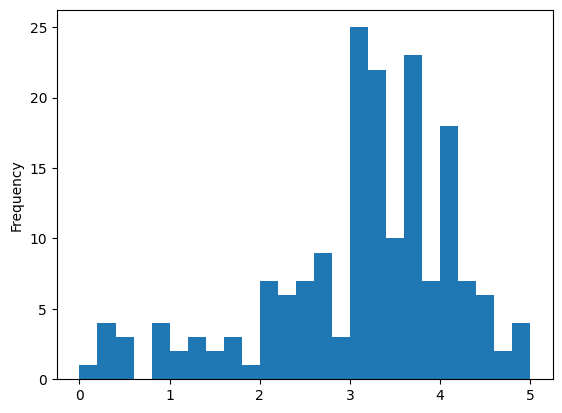

In [ ]:
datos['Nota_definitiva'].plot.hist(bins = 25); # Número fijo de intervalos de clase (bins)

Como podemos observar, las edades se encuentran en un rango notable que va de los 19 años a los 22.

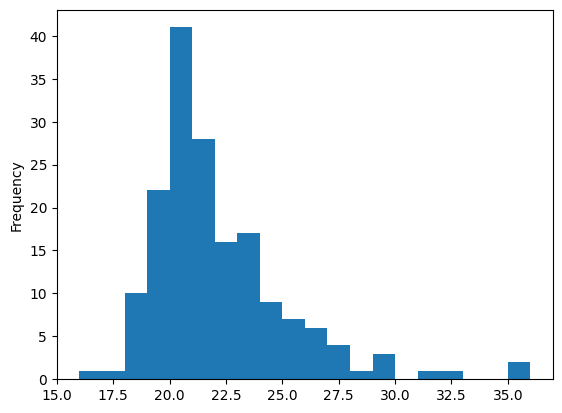

In [ ]:
datos['Edad'].plot.hist(bins = 20); # Número fijo de intervalos de clase (bins)

Estos histogramas representan gran utilidad para validar los análisis exploratorios inciales realizados anteriormente mediante la estadítica descriptiva, pues nos permite corroborar los rangos en los que se hacen las observaciones, por ejemplo, en el caso de la variable puntaje_admisión_UNAL en donde se analizaba el por qué la desviación estándar resultante era tan grande, observamos que, a partir del histograma los rango en los que se planteó el código tienen sentido.

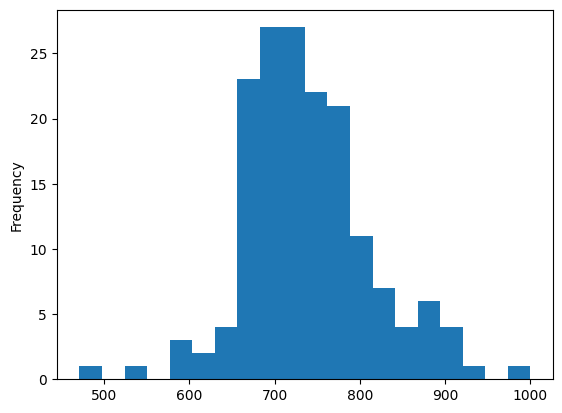

In [ ]:
datos['Puntaje_admisión_UNAL'].plot.hist(bins = 20); # Número fijo de intervalos de clase (bins)

**Diagrama de dispersión (scatter)**

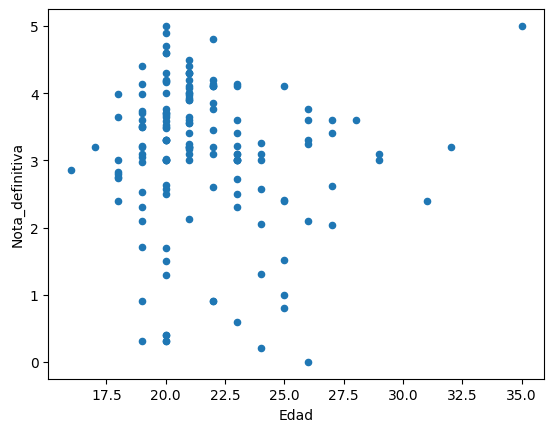

In [ ]:
datos.plot(kind='scatter', x='Edad', y='Nota_definitiva');

El gráfico de dispersión nos muestra como los estudiantes que obtuvieron notas mayores a 4.0 se encuentran en edades cercanas al promedio de edad.

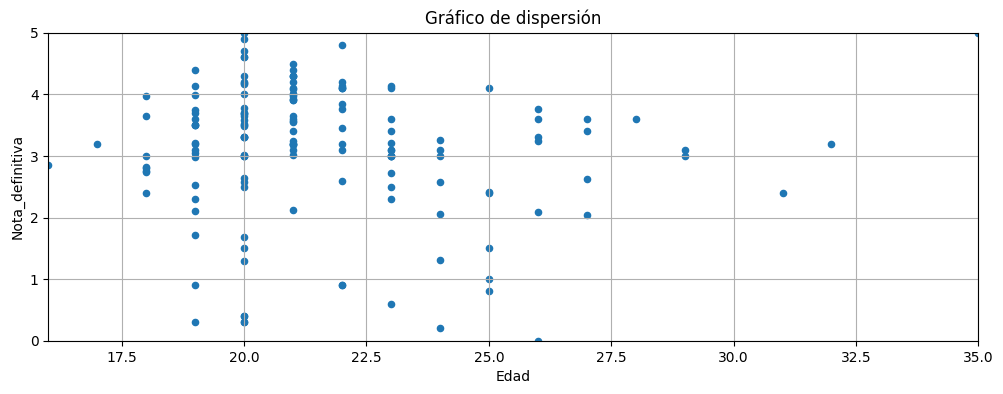

In [ ]:
fig = datos.plot(kind='scatter', x='Edad', y='Nota_definitiva',
        xlim=(16,35), ylim=(0,5), grid=True,
        title="Gráfico de dispersión", figsize=(12,4));

Asignaturas inscritas en función de Nota_definitva nos muestra un error en la toma de datos, pues no es posible que alguien tenga inscritas 18 materias. Por otra parte, la mayoría de estudiantes con un buen desempeño tenían inscritas 5 materias.

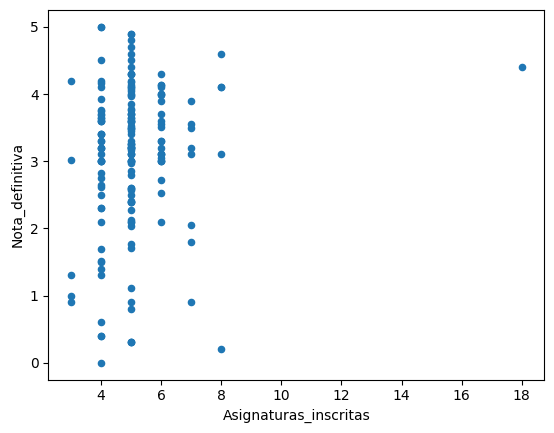

In [ ]:
datos.plot(kind='scatter', x='Asignaturas_inscritas', y='Nota_definitiva');

A pesar de que la mayoría de estudiantes le dedicaron menos de 10 horas de trabajo extraclase a la asignatura, obtuvieron una nota definitiva por encima de la media.

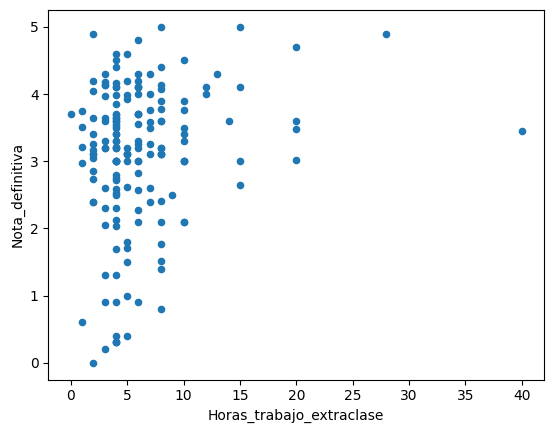

In [ ]:
datos.plot(kind='scatter', x='Horas_trabajo_extraclase', y='Nota_definitiva');

En el siguiente gráfico, es importante notar como en los estratos 2 y 3 se encuentran la mayor parte de los estudiantes con notas difinitivas por debajo de la media.

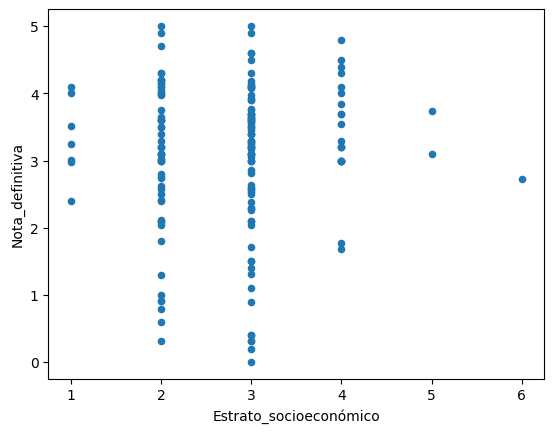

In [ ]:
datos.plot(kind='scatter', x='Estrato_socioeconómico', y='Nota_definitiva');

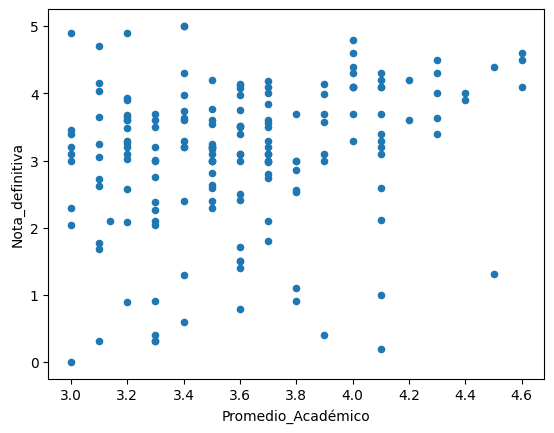

In [ ]:
datos.plot(kind='scatter', x='Promedio_Académico', y='Nota_definitiva');

**Gráfico de cajas (BoxPlot)**

Nota_definitiva presenta 6 valores atípicos por debajo de 1.0, sin mebargo, por debajo de la media siguen existiendo valores típicos.

<Axes: >

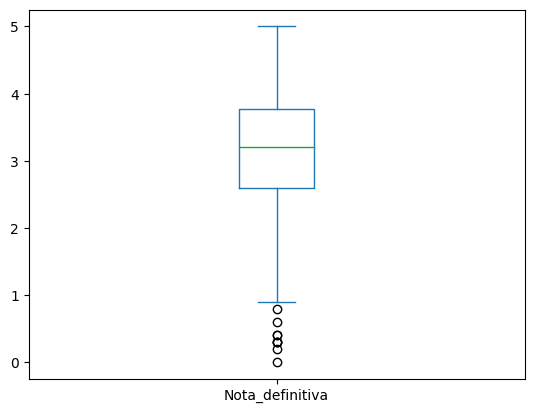

In [ ]:
datos['Nota_definitiva'].plot.box()

Existen valores atípicos máximos bastante dispersos respecto a Hora_trabajo_extraclase por encima de 15 horas

<Axes: >

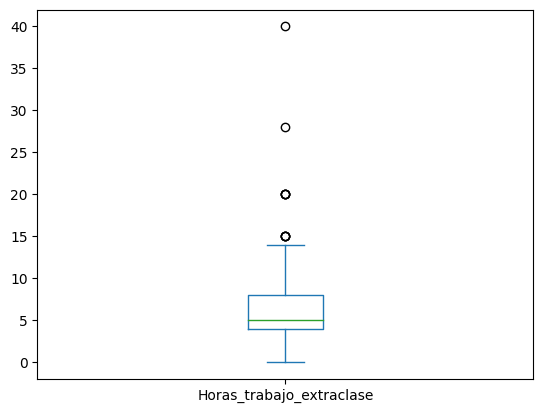

In [ ]:
datos['Horas_trabajo_extraclase'].plot.box()

Respecto a la edad, podemos observar que la mayor dispersión de datos y por lo tanto, los datos que causan la mayor parte de la desviación estándar, se encuentran en los valores máximos por encima de 27.5

<Axes: >

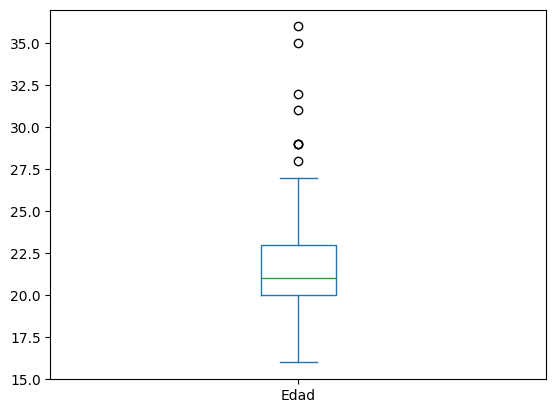

In [ ]:
datos['Edad'].plot.box()

**Group by**

En esta sección observamos que la maypría de estudiantes que estudiaron el colegios privados, pertenecen a estratos 4 y 5, provienen de Bogotá, no trabajan y no cuentan con estudios previos de la asignatura, presentan un primedio mayor respecto a las demás características de cada una de las variables analizadas. En cuanto al sexo, es arriesgado determinar un análisis ya que la muestra de mujeres no es significativa y puede causar sesgos.

In [ ]:
datos[['Estrato_socioeconómico','Nota_definitiva']].groupby('Estrato_socioeconómico').mean()

,Nota_definitiva
Estrato_socioeconómico,
1.0,3.322857
2.0,3.063684
3.0,3.003333
4.0,3.440952
5.0,3.420000
6.0,2.720000


In [ ]:
datos[['Sexo','Nota_definitiva']].groupby('Sexo').mean()

,Nota_definitiva
Sexo,
Femenino,3.090000
Masculino,3.106951


In [ ]:
datos[['Estado_laboral','Nota_definitiva']].groupby('Estado_laboral').mean()

,Nota_definitiva
Estado_laboral,
No trabaja,3.199016
Sí trabaja,2.864902


In [ ]:
datos[['Colegio','Nota_definitiva']].groupby('Colegio').mean()

,Nota_definitiva
Colegio,
Privado,3.236235
Público,2.957931


In [ ]:
datos[['Procedencia','Nota_definitiva']].groupby('Procedencia').mean()

,Nota_definitiva
Procedencia,
Bogotá,3.164312
Fuera de Bogotá,2.991875


In [ ]:
datos[['Estudios_previos','Nota_definitiva']].groupby('Estudios_previos').mean()

,Nota_definitiva
Estudios_previos,
Con estudios previos,2.975000
Sin estudios previos,3.131439


**Gráfico de barras**

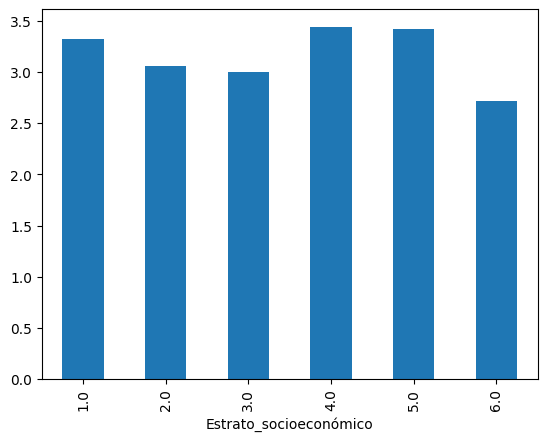

In [ ]:
datos[['Estrato_socioeconómico','Nota_definitiva']].groupby('Estrato_socioeconómico').mean()['Nota_definitiva'].plot.bar();

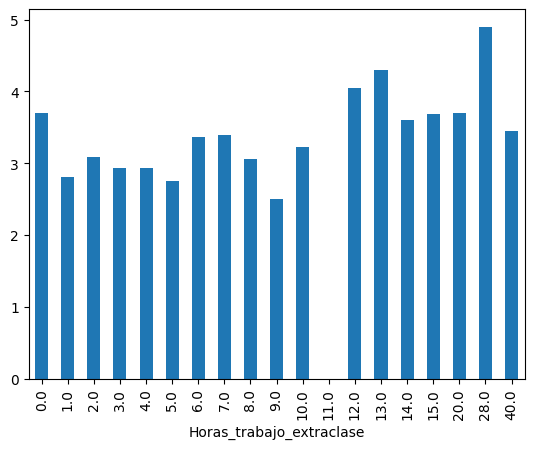

In [ ]:
datos[['Horas_trabajo_extraclase','Nota_definitiva']].groupby('Horas_trabajo_extraclase').mean()['Nota_definitiva'].plot.bar();

#### Usando Seaborn

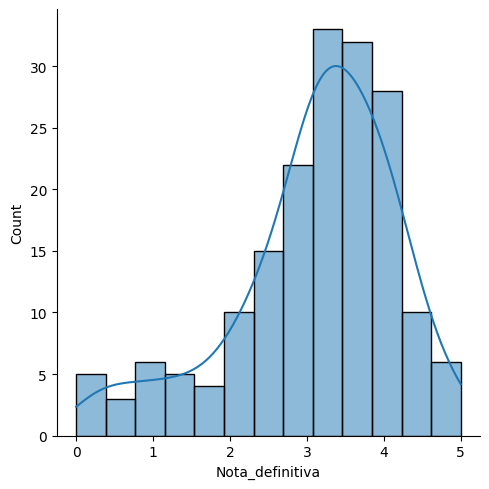

In [ ]:
sns.displot(datos['Nota_definitiva'], kde=True)

Lo promedios académicos bajos no siempre obtienen malas notas finales, son embargo, la mayoría de estudiantes con promedios altos, se encuentras con notas definitivas por encima de la media.

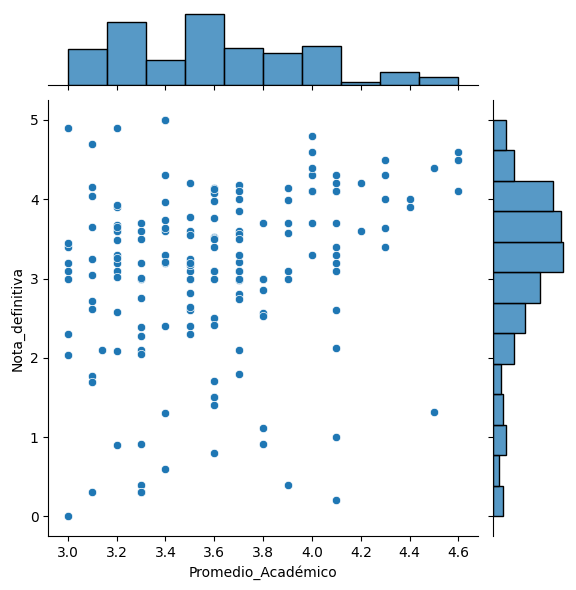

In [ ]:
sns.jointplot(x='Promedio_Académico', y='Nota_definitiva', data=datos)   #se define la columna a diagramar en cada uno de los dos ejes, y el dataset correspondiente

Los estudiantes con promedios entre 3.2 y y 3.7 obtuvieron notas definitivas cercanas o por encima de la media, es decir, notas con valores entre 3.0 y 4.0.

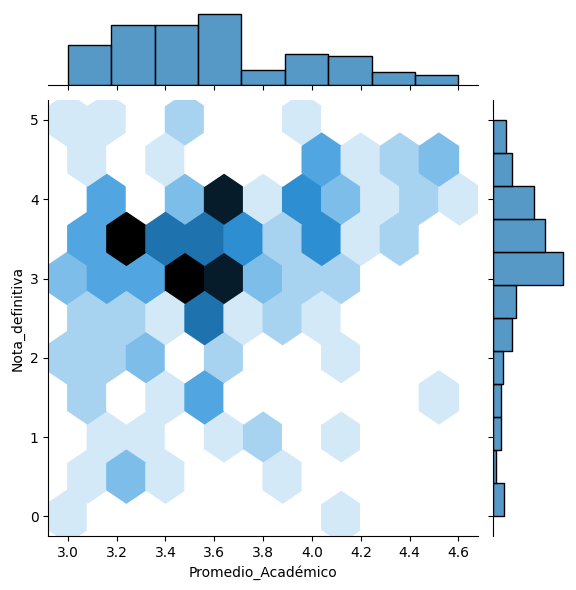

In [ ]:
sns.jointplot(x='Promedio_Académico', y='Nota_definitiva', data=datos, kind='hex')
# Se representa la relación con hexagonos, a mayor densidad de puntos, más oscuro se presenta el hexágono correspondiente

Podemos adicionar un objeto "colorBar" usando matplotlib:

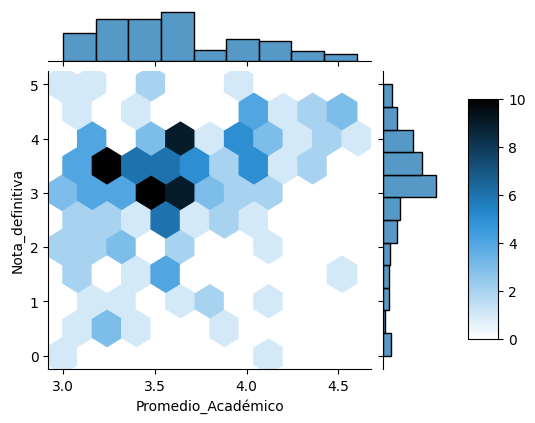

In [ ]:
hexplot = sns.jointplot(x='Promedio_Académico', y='Nota_definitiva', data=datos, kind="hex")
plt.subplots_adjust(left=0.15, right=0.8, top=0.8, bottom=0.2)  # reducimos el tamaño de la figura original para darle espacio al colorBar
# Constriumos un nuevo "axe" para el colorBar
cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, ancho, alto
plt.colorbar(cax=cbar_ax)
plt.show()

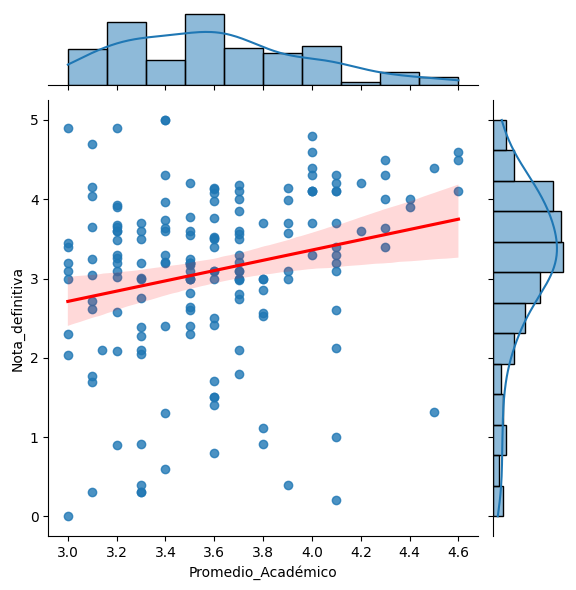

In [ ]:
sns.jointplot(x='Promedio_Académico', y='Nota_definitiva', data=datos, kind='reg', joint_kws={'line_kws':{'color':'r'}})
# Es básicamente el diagrama de tipo scatter, pero se incluye la linea de regresión lineal

El método `pairplot` permite explorar un conjunto de datos con facilidad al representar diagramas de dispersión para todas las combinaciones entre las variables numéricas e histogramas para cada variable numérica, así:

La variable Nota_definitiva, muestra gran relación respecto a la variable pre_metas_extrínsecas, quienes asignaron valores mayores a 5 en esta última, obtuvieron mejores resultados en su nota definitiva respecto a los que asiganron valores menores a 5. Esto también se puede observar respecto al promedio acádemico.

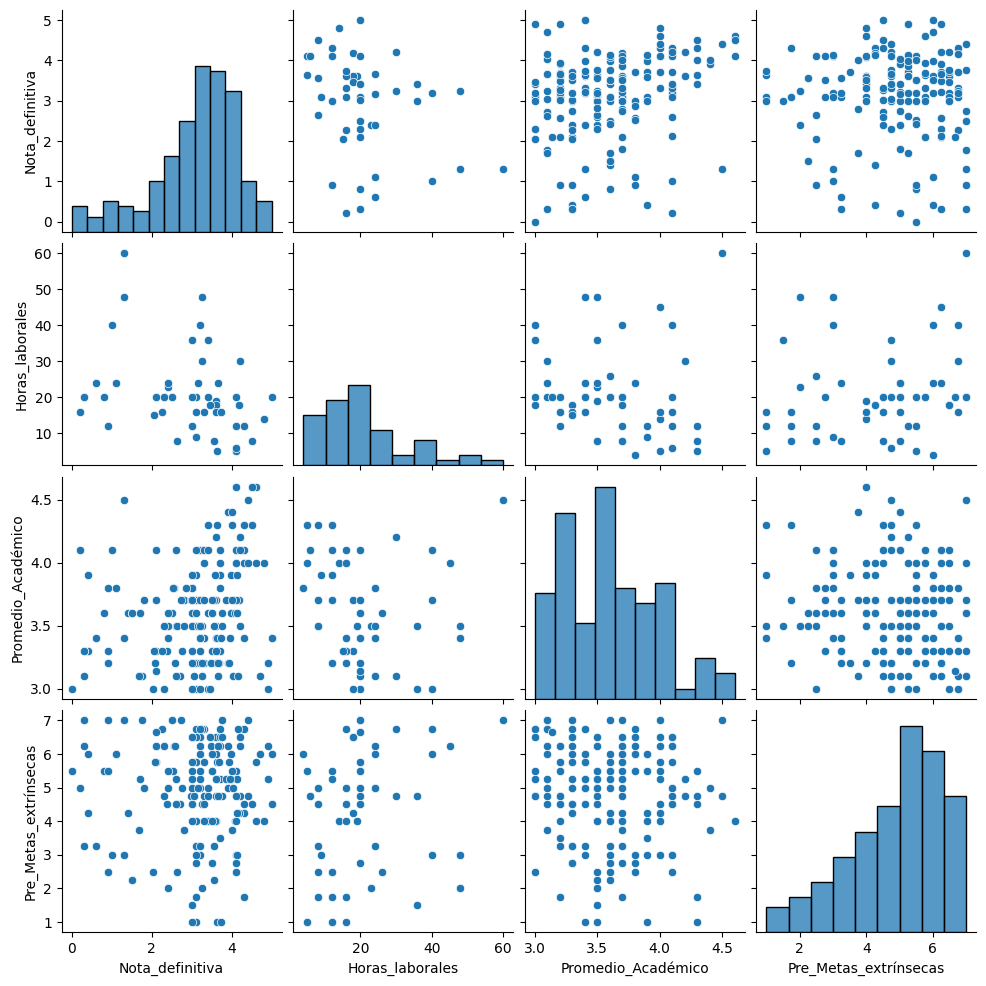

In [ ]:
sns.pairplot(datos[['Nota_definitiva', 'Horas_laborales', 'Promedio_Académico', 'Pre_Metas_extrínsecas']])

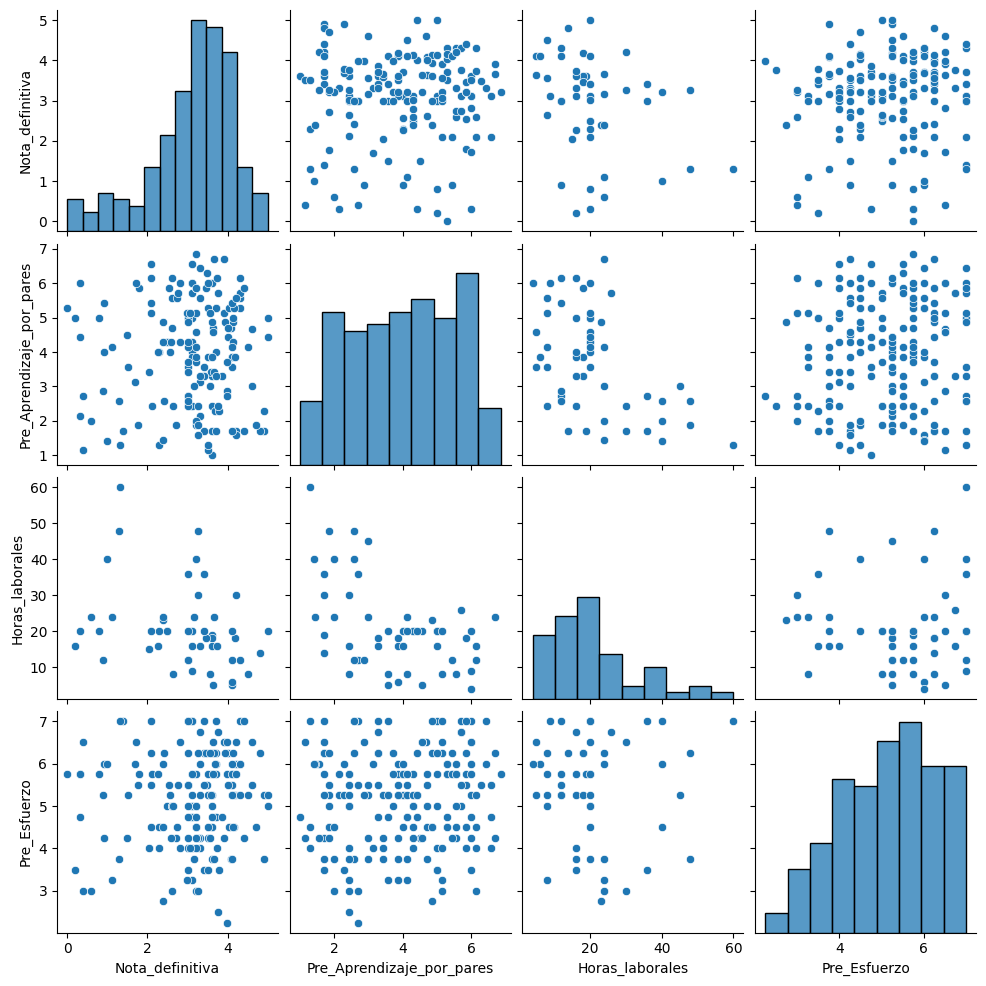

In [ ]:
sns.pairplot(datos[['Nota_definitiva', 'Pre_Aprendizaje_por_pares', 'Horas_laborales', 'Pre_Esfuerzo']])

Existe una relación entre la cantidad de horas laborales y el pre de aprendizaje por pares, esto puede estar relacionado con el hecho de que los estudiantes con jornadas laborales extendidas, tienen menos oportunidad de apoyerse o compartir con los compañeros del curso debido a que deben dar prioridad a su trabajo posiblemente.

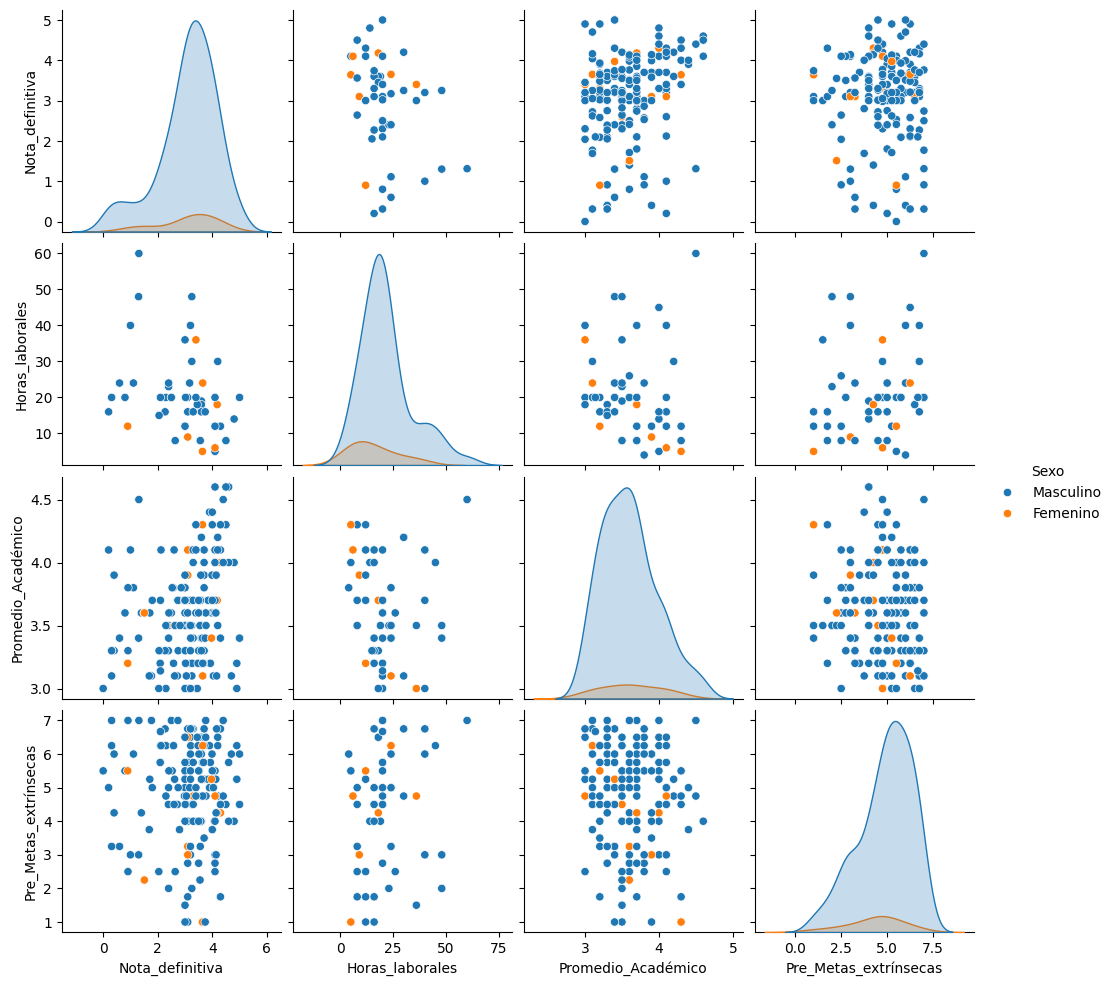

In [ ]:
sns.pairplot(datos[['Nota_definitiva', 'Sexo', 'Horas_laborales', 'Promedio_Académico', 'Pre_Metas_extrínsecas']],
       hue='Sexo')
# El parámetro hue define un tono de color para cada dato de acuerdo a una variable categórica
# Si queremos usar histogramas en la diagonal, usar el parámetro: diag_kind='hist'

El siguiente gráfico valida que la mayoría de estudiantes se encuentran en los estratos medio-bajos, es decir 3 y 2

<Axes: xlabel='Estrato_socioeconómico', ylabel='count'>

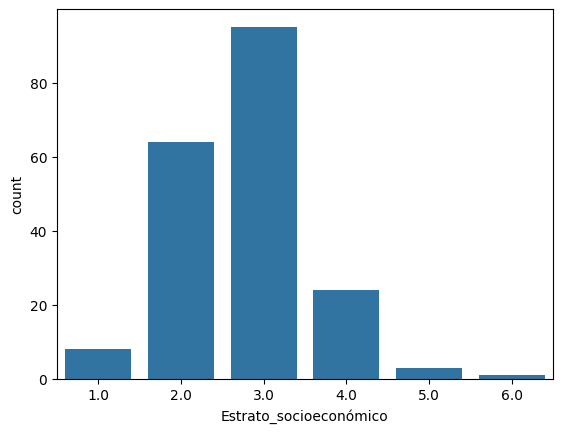

In [ ]:
sns.countplot(x='Estrato_socioeconómico',data=datos)

La mayoría de estratos obtuvieron notas por encima de la media, sin embargo el estrato 3 presenta valores atípicos mínimos.

Text(0, 0.5, 'Nota')

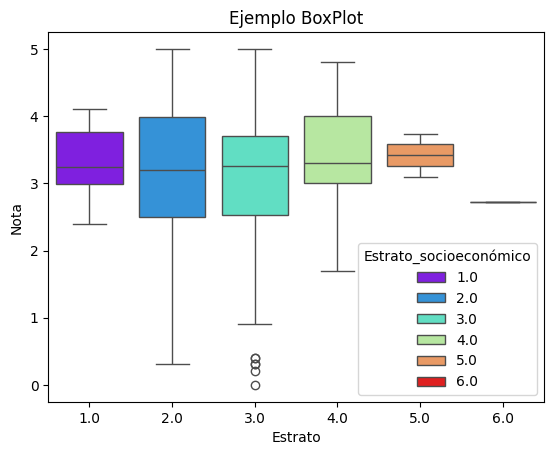

In [ ]:
ax = sns.boxplot(x="Estrato_socioeconómico", y="Nota_definitiva", data=datos,
                 palette='rainbow', hue="Estrato_socioeconómico")
ax.set_title("Ejemplo BoxPlot")
ax.set_xlabel("Estrato")
ax.set_ylabel("Nota")

# 2 Análisis de correlaciones

In [ ]:
datos[['Nota_definitiva', 'Edad',
       'Estrato_socioeconómico', 'Horas_laborales',
       'Asignaturas_inscritas', 'Horas_trabajo_extraclase',
       'Puntaje_admisión_UNAL',
       'Promedio_Académico', 'Pre_Metas_intrínsecas', 'Pre_Metas_extrínsecas',
       'Pre_Valoración_de_la_tarea', 'Pre_Control_del_Aprendizaje',
       'Pre_Expectativas_de_autoeficacia_en_el_rendimiento',
       'Pre_Expectativas_de_autoeficacia_en_el_aprendizaje', 'Pre_Ansiedad',
       'Pre_Memorización', 'Pre_Elaboración_de_ideas',
       'Pre_Organización_de_ideas', 'Pre_Pensamiento_Crítico',
       'Pre_Metacognición_Planeación',
       'Pre_Metacognición_cambio_método_de_estudio',
       'Pre_Metacognición_seguimiento', 'Pre_Administración_tiempo_de_estudio',
       'Pre_Lugar_de_estudio', 'Pre_Esfuerzo', 'Pre_Aprendizaje_por_pares',
       'Pos_Metas_intrínsecas', 'Pos_Metas_extrínsecas',
       'Pos_Valoración_de_la_tarea', 'Pos_Control_del_Aprendizaje',
       'Pos_Expectativas_de_autoeficacia_en_el_rendimiento',
       'Pos_Expectativas_de_autoeficacia_en_el_aprendizaje', 'Pos_Ansiedad',
       'Pos_Memorización', 'Pos_Elaboración_de_ideas',
       'Pos_Organización_de_ideas', 'Pos_Pensamiento_Crítico',
       'Pos_Metacognición_Planeación',
       'Pos_Metacognición_cambio_método_de_estudio',
       'Pos_Metacognición_seguimiento', 'Pos_Administración_tiempo_de_estudio',
       'Pos_Lugar_de_estudio', 'Pos_Esfuerzo', 'Pos_Aprendizaje_por_pares']].corr()  #Retorna la matrix de correlaciones para pares de columnas con valor numérico
# Por defecto: Pearson

,Nota_definitiva,Edad,Estrato_socioeconómico,Horas_laborales,Asignaturas_inscritas,Horas_trabajo_extraclase,Puntaje_admisión_UNAL,Promedio_Académico,Pre_Metas_intrínsecas,Pre_Metas_extrínsecas,...,Pos_Elaboración_de_ideas,Pos_Organización_de_ideas,Pos_Pensamiento_Crítico,Pos_Metacognición_Planeación,Pos_Metacognición_cambio_método_de_estudio,Pos_Metacognición_seguimiento,Pos_Administración_tiempo_de_estudio,Pos_Lugar_de_estudio,Pos_Esfuerzo,Pos_Aprendizaje_por_pares
Nota_definitiva,1.000000,-0.067574,0.040087,-0.309815,0.153953,0.192311,0.192852,0.234216,0.046010,-0.018272,...,-0.036451,-0.061672,0.211823,0.283748,-0.067317,0.079702,0.182790,0.094699,0.128900,0.086289
Edad,-0.067574,1.000000,-0.140579,0.232918,-0.036036,0.024488,0.078084,-0.160509,-0.008113,-0.066654,...,0.096055,0.162563,0.061718,-0.013787,0.082668,0.097071,0.092671,0.055838,0.088317,-0.036678
Estrato_socioeconómico,0.040087,-0.140579,1.000000,-0.184643,0.129424,-0.096403,0.266128,0.094590,0.133792,-0.149153,...,0.056433,-0.062624,-0.115438,-0.042865,-0.035503,-0.088519,-0.168040,-0.081178,-0.094072,-0.020614
Horas_laborales,-0.309815,0.232918,-0.184643,1.000000,-0.437739,-0.168524,-0.265167,-0.085385,0.110154,0.179671,...,-0.033152,-0.123861,-0.033766,-0.198271,-0.234157,-0.033772,-0.293432,-0.305312,0.031485,-0.000540
Asignaturas_inscritas,0.153953,-0.036036,0.129424,-0.437739,1.000000,-0.096198,0.183690,0.229135,0.106438,-0.025715,...,-0.160381,0.092217,0.040848,0.116073,0.048607,0.046276,0.023913,0.088945,-0.115819,-0.005747
Horas_trabajo_extraclase,0.192311,0.024488,-0.096403,-0.168524,-0.096198,1.000000,0.018206,-0.010410,0.105198,0.102855,...,0.011405,-0.035776,0.128942,-0.036149,0.140033,0.198317,0.244994,0.115931,0.193373,0.072636
Puntaje_admisión_UNAL,0.192852,0.078084,0.266128,-0.265167,0.183690,0.018206,1.000000,0.216418,0.102474,-0.207047,...,-0.165209,-0.088844,-0.100650,-0.057366,-0.121310,0.009642,-0.178061,-0.127691,-0.092874,-0.195287
Promedio_Académico,0.234216,-0.160509,0.094590,-0.085385,0.229135,-0.010410,0.216418,1.000000,0.052844,-0.126424,...,-0.084977,0.028219,0.224550,0.180654,0.041290,0.306037,0.123553,0.138372,0.224763,0.076235
Pre_Metas_intrínsecas,0.046010,-0.008113,0.133792,0.110154,0.106438,0.105198,0.102474,0.052844,1.000000,0.055235,...,0.156711,0.005506,0.249235,0.055041,0.021054,0.247744,-0.021483,0.145256,0.122469,-0.117534
Pre_Metas_extrínsecas,-0.018272,-0.066654,-0.149153,0.179671,-0.025715,0.102855,-0.207047,-0.126424,0.055235,1.000000,...,0.088941,0.103293,0.001593,-0.052187,0.107622,0.052510,0.196958,0.079057,0.123796,0.058583


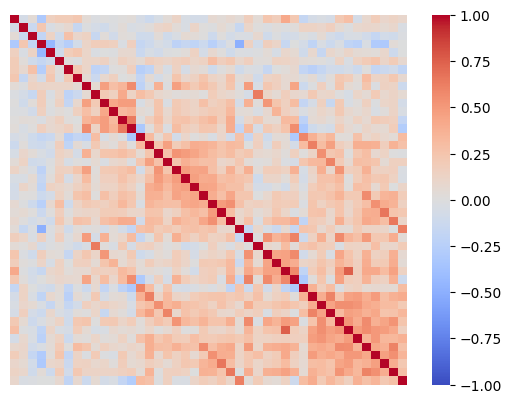

In [ ]:
# Mapa de calor con la matriz de correlación anterior (más adelante mejoraremos esta visualización notablemente)
mapa_calor = sns.heatmap(datos.corr(numeric_only=True), cmap='coolwarm', vmin=-1, vmax=1,
                         xticklabels=False, yticklabels=False)

#### Matriz de correlaciones

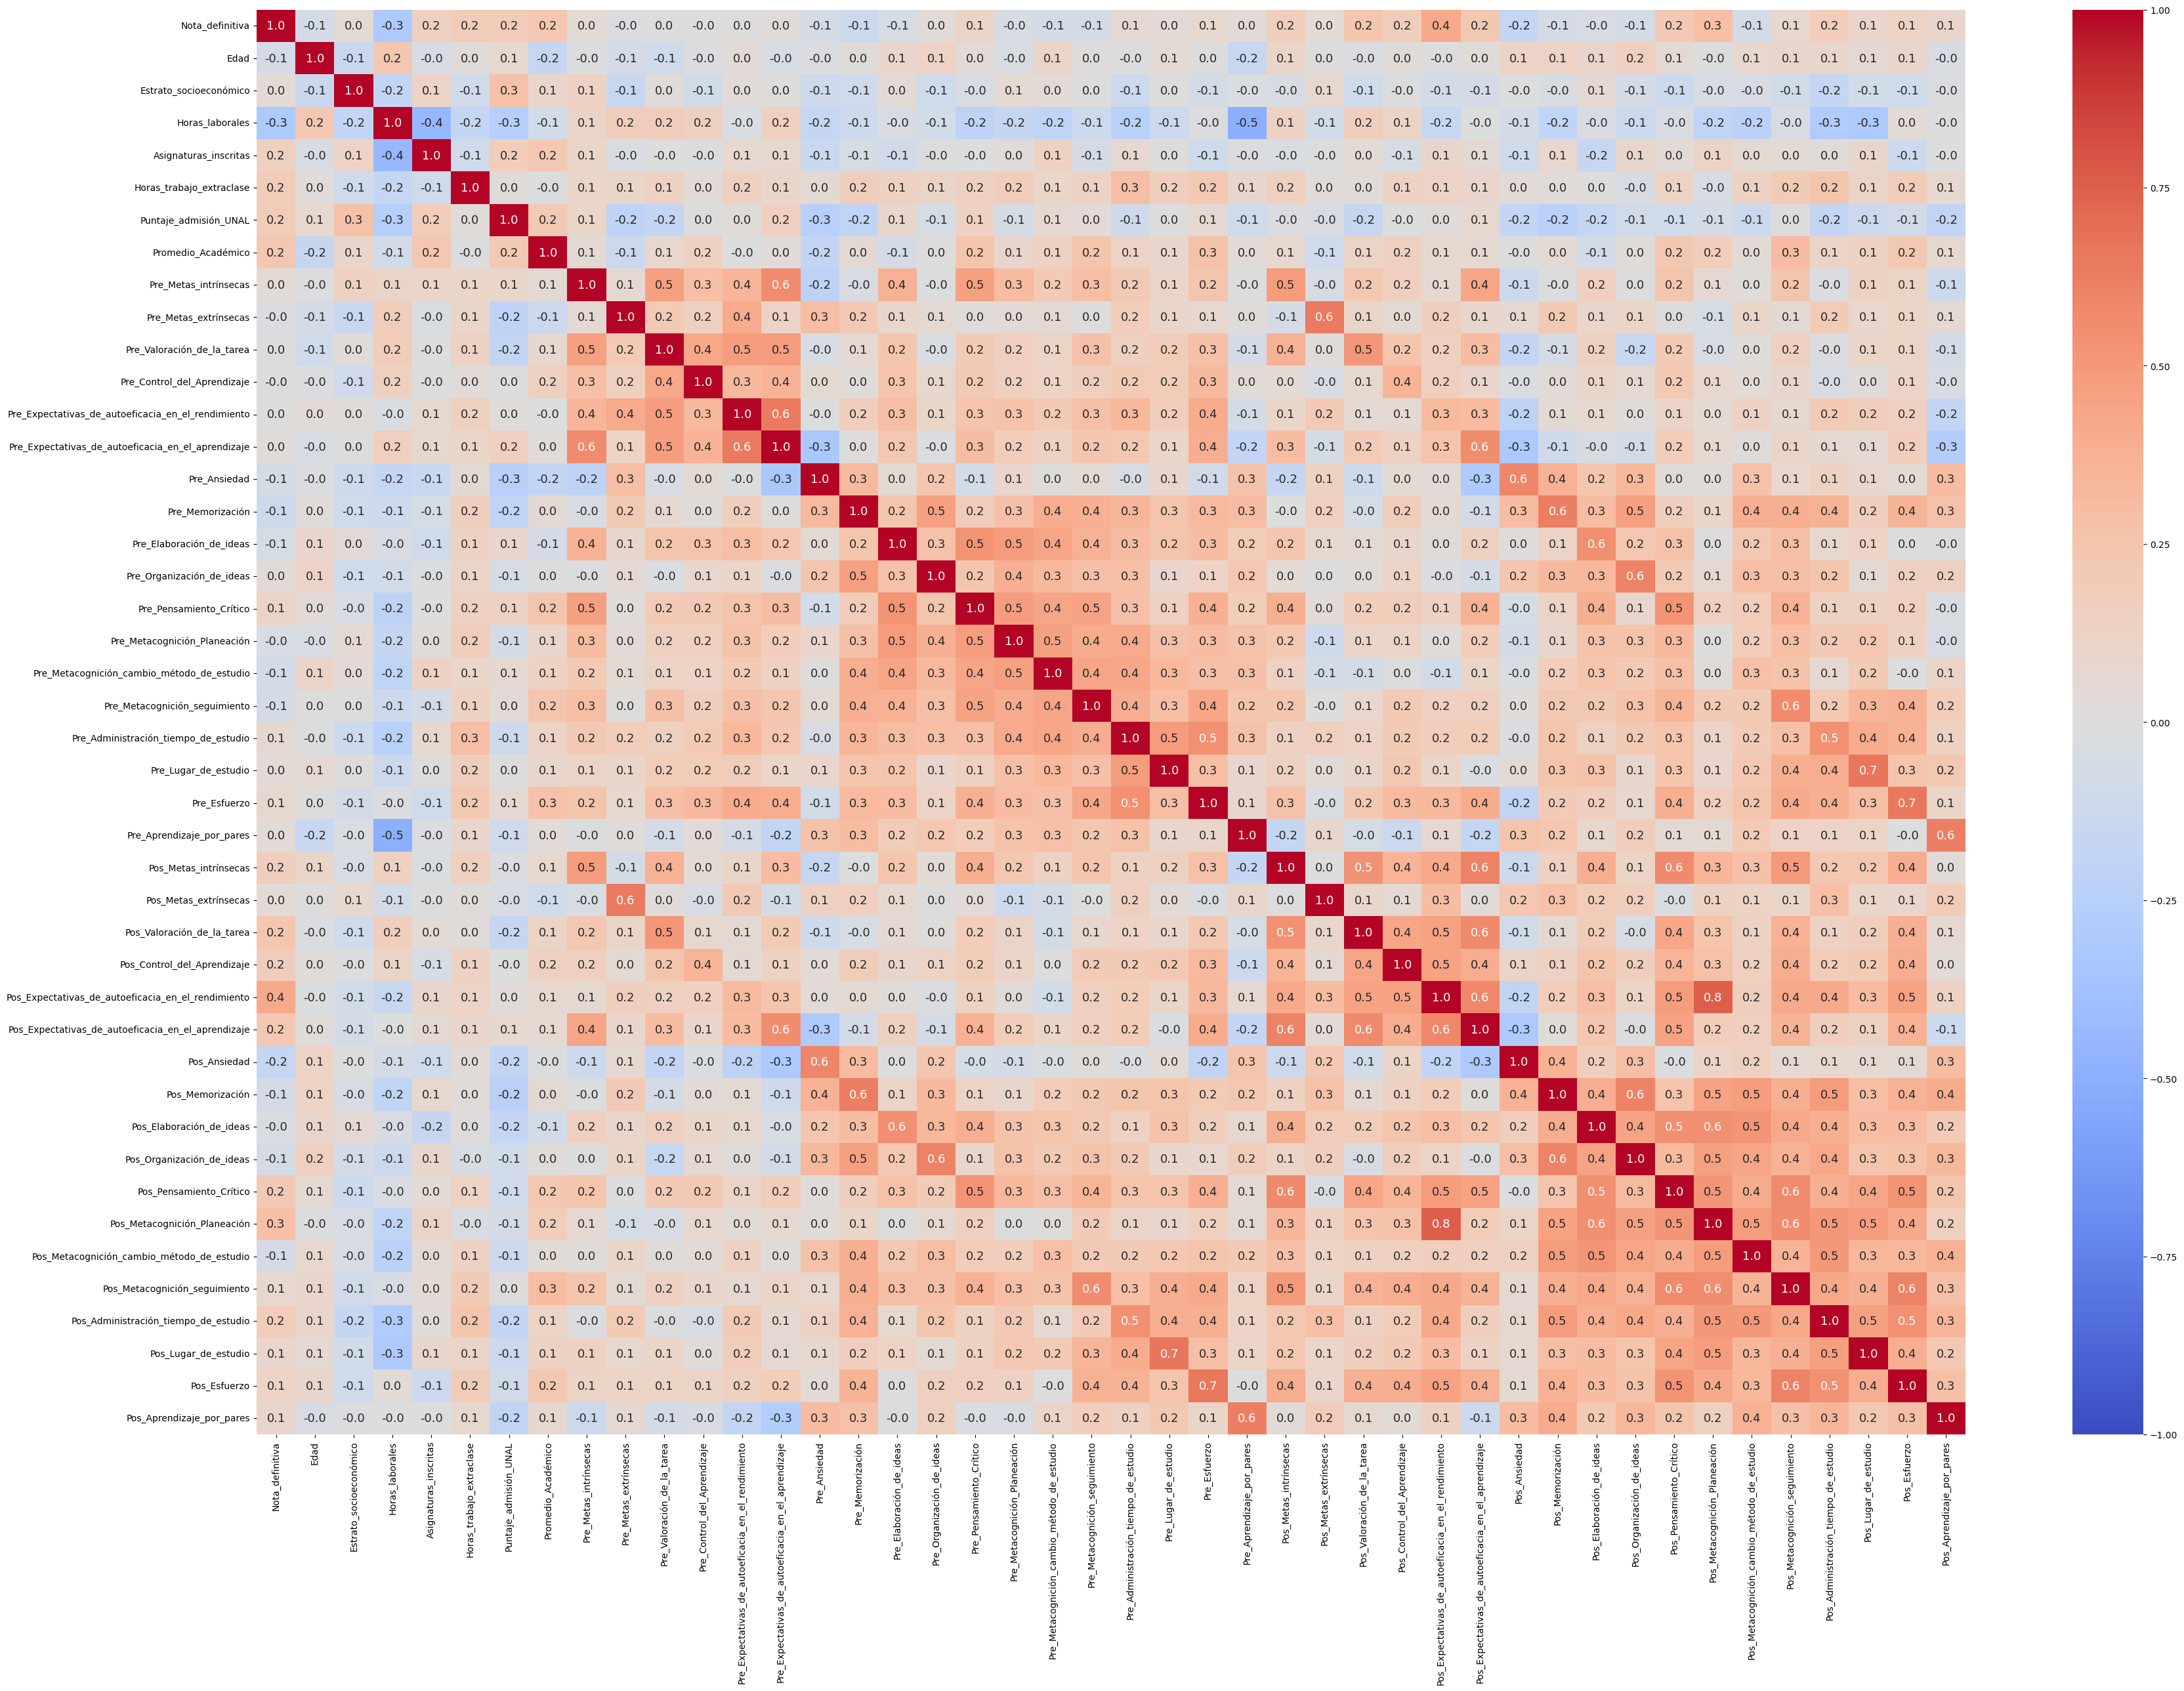

In [ ]:
fig, ax = plt.subplots(figsize = (42, 28.2))
mapa_calor = sns.heatmap(datos.corr(numeric_only=True),
                         annot = True,
                         cmap = 'coolwarm',
                         vmin = -1.0,
                         vmax = 1.0,
                         fmt = ".1f",
                         annot_kws = {'size':13}
                         )
plt.show()

#### Usando SciPy

Permite obtener el p-valor de la correlación para saber si es significativa o no.

In [ ]:
from scipy import stats

Vamos a revisar las correlaciones significativas con respecto a la Nota definitiva, promedio académico, horas de trabajo extraclase, edad y horas laborales.

1. Debemos saber si las variables están normalmente distribuidas o no. Para esto, haremos el test de normalidad de Shapiro-Wilk (ver https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html), donde se hipotetiza ($H_0$) que los datos siguen una distribución normal:

In [ ]:
stat, p = stats.shapiro(datos['Nota_definitiva'])
if (p < 0.05):
  print(f"Los datos de la Nota_definitiva NO provienen de una distribución normal (p-valor = {p:.3f}). ")
else:
  print(f"Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = {p:.3f}). ")

Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = 1.000). 


In [ ]:
stat, p = stats.shapiro(datos['Promedio_Académico'])
if (p < 0.05):
  print(f"Los datos de la Nota_definitiva NO provienen de una distribución normal (p-valor = {p:.3f}). ")
else:
  print(f"Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = {p:.3f}). ")

Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = 1.000). 


In [ ]:
stat, p = stats.shapiro(datos['Horas_trabajo_extraclase'])
if (p < 0.05):
  print(f"Los datos de la Nota_definitiva NO provienen de una distribución normal (p-valor = {p:.3f}). ")
else:
  print(f"Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = {p:.3f}). ")

Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = 1.000). 


In [ ]:
stat, p = stats.shapiro(datos['Edad'])
if (p < 0.05):
  print(f"Los datos de la Nota_definitiva NO provienen de una distribución normal (p-valor = {p:.3f}). ")
else:
  print(f"Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = {p:.3f}). ")

Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = 1.000). 


In [ ]:
stat, p = stats.shapiro(datos['Horas_laborales'])
if (p < 0.05):
  print(f"Los datos de la Nota_definitiva NO provienen de una distribución normal (p-valor = {p:.3f}). ")
else:
  print(f"Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = {p:.3f}). ")

Los datos de la Nota_definitiva SI provienen de una distribución normal (p-valor = 1.000). 


2. En este caso, como la variable Nota_definitiva no está distribuida normalmente, haremos el análisis de correlaciones usando el coeficiente de correlación de Spearman (no paramétrico). En el análisis de correlaciones se hipotetiza ($H_0$) que NO hay correlación entre las variables:

In [ ]:
for factor in datos.columns:
  if factor not in ['Estudiante', 'Nota_definitiva', 'Sexo', 'Estrato_socioeconómico',
                    'Estado_laboral', 'Colegio', 'Procedencia', 'Estudios_previos']:
    cols_completos = ['Nota_definitiva', factor] # Se excluyen las variables categóricas, la nota y la misma variable (factor)
    datos_completos = datos.dropna(subset=cols_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
    coef, p = stats.spearmanr(datos_completos[factor], datos_completos['Nota_definitiva']) #Coeficiente de correlación de Spearman
    if p < 0.05:
      print(f'La Nota_definitiva está correlacionada de forma significativa con {factor} (coef = {coef:.2f}; p-valor = {p:.3f})')
    #else:
    #  print(f'Las muestras no están correlacionadas de forma significativa (p = {p:.2f})')

La Nota_definitiva está correlacionada de forma significativa con Horas_laborales (coef = -0.33; p-valor = 0.020)
La Nota_definitiva está correlacionada de forma significativa con Promedio_Académico (coef = 0.26; p-valor = 0.001)
La Nota_definitiva está correlacionada de forma significativa con Pos_Valoración_de_la_tarea (coef = 0.20; p-valor = 0.024)
La Nota_definitiva está correlacionada de forma significativa con Pos_Control_del_Aprendizaje (coef = 0.19; p-valor = 0.028)
La Nota_definitiva está correlacionada de forma significativa con Pos_Expectativas_de_autoeficacia_en_el_rendimiento (coef = 0.45; p-valor = 0.000)
La Nota_definitiva está correlacionada de forma significativa con Pos_Expectativas_de_autoeficacia_en_el_aprendizaje (coef = 0.25; p-valor = 0.004)
La Nota_definitiva está correlacionada de forma significativa con Pos_Ansiedad (coef = -0.18; p-valor = 0.037)
La Nota_definitiva está correlacionada de forma significativa con Pos_Pensamiento_Crítico (coef = 0.18; p-valor = 

3. Ahora, como las demás variables están distribuidas normalmente, haremos el análisis de correlaciones usando el coeficiente de correlación de Pearson (Paramétrico):

In [ ]:
for factor in datos.columns:
  if factor not in ['Estudiante', 'Sexo', 'Estrato_socioeconómico',
                    'Estado_laboral', 'Colegio', 'Procedencia', 'Estudios_previos', 'Promedio_Académico']:
    cols_completos = ['Promedio_Académico', factor] # Se excluyen las variables categóricas, la nota y la misma variable (factor)
    datos_completos = datos.dropna(subset=cols_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
    coef, p = stats.pearsonr(datos_completos[factor], datos_completos['Promedio_Académico']) #Coeficiente de correlación de Spearman
    if p < 0.05:
      print(f'La Nota_definitiva está correlacionada de forma significativa con {factor} (coef = {coef:.2f}; p-valor = {p:.3f})')
    #else:
    #  print(f'Las muestras no están correlacionadas de forma significativa (p = {p:.2f})')

La Nota_definitiva está correlacionada de forma significativa con Nota_definitiva (coef = 0.23; p-valor = 0.002)
La Nota_definitiva está correlacionada de forma significativa con Edad (coef = -0.16; p-valor = 0.038)
La Nota_definitiva está correlacionada de forma significativa con Asignaturas_inscritas (coef = 0.23; p-valor = 0.001)
La Nota_definitiva está correlacionada de forma significativa con Puntaje_admisión_UNAL (coef = 0.22; p-valor = 0.005)
La Nota_definitiva está correlacionada de forma significativa con Pre_Control_del_Aprendizaje (coef = 0.15; p-valor = 0.039)
La Nota_definitiva está correlacionada de forma significativa con Pre_Ansiedad (coef = -0.17; p-valor = 0.017)
La Nota_definitiva está correlacionada de forma significativa con Pre_Pensamiento_Crítico (coef = 0.25; p-valor = 0.001)
La Nota_definitiva está correlacionada de forma significativa con Pre_Metacognición_cambio_método_de_estudio (coef = 0.14; p-valor = 0.050)
La Nota_definitiva está correlacionada de forma s

In [ ]:
for factor in datos.columns:
  if factor not in ['Estudiante', 'Sexo', 'Estrato_socioeconómico',
                    'Estado_laboral', 'Colegio', 'Procedencia', 'Estudios_previos','Horas_trabajo_extraclase']:
    cols_completos = ['Horas_trabajo_extraclase', factor] # Se excluyen las variables categóricas, la nota y la misma variable (factor)
    datos_completos = datos.dropna(subset=cols_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
    coef, p = stats.pearsonr(datos_completos[factor], datos_completos['Horas_trabajo_extraclase']) #Coeficiente de correlación de Spearman
    if p < 0.05:
      print(f'La Nota_definitiva está correlacionada de forma significativa con {factor} (coef = {coef:.2f}; p-valor = {p:.3f})')
    #else:
    #  print(f'Las muestras no están correlacionadas de forma significativa (p = {p:.2f})')

La Nota_definitiva está correlacionada de forma significativa con Nota_definitiva (coef = 0.19; p-valor = 0.011)
La Nota_definitiva está correlacionada de forma significativa con Pre_Expectativas_de_autoeficacia_en_el_rendimiento (coef = 0.15; p-valor = 0.041)
La Nota_definitiva está correlacionada de forma significativa con Pre_Memorización (coef = 0.17; p-valor = 0.020)
La Nota_definitiva está correlacionada de forma significativa con Pre_Pensamiento_Crítico (coef = 0.15; p-valor = 0.034)
La Nota_definitiva está correlacionada de forma significativa con Pre_Metacognición_Planeación (coef = 0.17; p-valor = 0.018)
La Nota_definitiva está correlacionada de forma significativa con Pre_Administración_tiempo_de_estudio (coef = 0.29; p-valor = 0.000)
La Nota_definitiva está correlacionada de forma significativa con Pre_Lugar_de_estudio (coef = 0.17; p-valor = 0.023)
La Nota_definitiva está correlacionada de forma significativa con Pre_Esfuerzo (coef = 0.22; p-valor = 0.002)
La Nota_definiti

In [ ]:
for factor in datos.columns:
  if factor not in ['Estudiante', 'Sexo', 'Estrato_socioeconómico',
                    'Estado_laboral', 'Colegio', 'Procedencia', 'Estudios_previos','Edad']:
    cols_completos = ['Edad', factor] # Se excluyen las variables categóricas, la nota y la misma variable (factor)
    datos_completos = datos.dropna(subset=cols_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
    coef, p = stats.pearsonr(datos_completos[factor], datos_completos['Edad']) #Coeficiente de correlación de Spearman
    if p < 0.05:
      print(f'La Nota_definitiva está correlacionada de forma significativa con {factor} (coef = {coef:.2f}; p-valor = {p:.3f})')
    #else:
    #  print(f'Las muestras no están correlacionadas de forma significativa (p = {p:.2f})')

La Nota_definitiva está correlacionada de forma significativa con Promedio_Académico (coef = -0.16; p-valor = 0.038)


In [ ]:
for factor in datos.columns:
  if factor not in ['Estudiante', 'Sexo', 'Estrato_socioeconómico',
                    'Estado_laboral', 'Colegio', 'Procedencia', 'Estudios_previos','Horas_laborales']:
    cols_completos = ['Horas_laborales', factor] # Se excluyen las variables categóricas, la nota y la misma variable (factor)
    datos_completos = datos.dropna(subset=cols_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
    coef, p = stats.pearsonr(datos_completos[factor], datos_completos['Horas_laborales']) #Coeficiente de correlación de Spearman
    if p < 0.05:
      print(f'La Nota_definitiva está correlacionada de forma significativa con {factor} (coef = {coef:.2f}; p-valor = {p:.3f})')
    #else:
    #  print(f'Las muestras no están correlacionadas de forma significativa (p = {p:.2f})')

La Nota_definitiva está correlacionada de forma significativa con Nota_definitiva (coef = -0.31; p-valor = 0.029)
La Nota_definitiva está correlacionada de forma significativa con Asignaturas_inscritas (coef = -0.44; p-valor = 0.001)
La Nota_definitiva está correlacionada de forma significativa con Pre_Aprendizaje_por_pares (coef = -0.50; p-valor = 0.000)


De acuerdo a lo anterior, algunas de las correlaciones más notables son:


*   Nota_definitiva y Promedio_Académico
*   Nota_definitiva y Pos_Expectativas_de_autoeficacia_en_el_rendimiento
*   Promedio_Académico y Pre_Esfuerzo
*   Promedio_Académico y Pos_Metacognición_seguimiento
*   Horas_trabajo_extraclase y Pre_Administración_tiempo_de_estudio
*   Horas_laborales y Pre_Aprendizaje_por_pares
*   Horas_laborales y Asignaturas_inscritas

De estas, excluimos las "pos", ya que son una autopercepción porterior del estudiante y no es concluyente.








# 3. Análisis ANOVA de 1 factor (variable cuantitativa - variable categórica)

Un análisis de varianza (ANOVA) prueba la hipótesis de que las medias de dos o más poblaciones son iguales. Los ANOVA evalúan la importancia de uno o más factores al comparar las medias de la variable de respuesta en los diferentes niveles de los factores. La hipótesis nula establece que todas las medias de la población (medias de los niveles de los factores) son iguales mientras que la hipótesis alternativa establece que al menos una es diferente. Para ejecutar un ANOVA, debe tener una variable de respuesta continua y al menos un factor categórico con dos o más niveles. Tomado de: https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/anova/supporting-topics/basics/what-is-anova/

En Python se puede realizar este análisis de distintas maneras:

### Usando SciPy

In [ ]:
# Separamos los datos de acuerdo al factor
grupos = datos.groupby('Sexo')
masculino = datos.loc[grupos.groups['Masculino']]
femenino = datos.loc[grupos.groups['Femenino']]
print(masculino.head())


     Estudiante  Nota_definitiva       Sexo  Edad  Estrato_socioeconómico  \
0  Estudiante 1              3.5  Masculino  20.0                     3.0   
1  Estudiante 2              3.1  Masculino   NaN                     2.0   
2  Estudiante 3              3.3  Masculino  20.0                     3.0   
3  Estudiante 4              4.9  Masculino  20.0                     3.0   
5  Estudiante 6              0.0  Masculino  26.0                     3.0   

  Estado_laboral  Horas_laborales  Asignaturas_inscritas  \
0     No trabaja              NaN                    5.0   
1     No trabaja              NaN                    5.0   
2     No trabaja              NaN                    6.0   
3     No trabaja              NaN                    5.0   
5     No trabaja              NaN                    4.0   

   Horas_trabajo_extraclase  Colegio  ... Pos_Elaboración_de_ideas  \
0                      10.0  Público  ...                      4.2   
1                       2.0  Privado

In [ ]:
print(femenino.head())

       Estudiante  Nota_definitiva      Sexo  Edad  Estrato_socioeconómico  \
14  Estudiante 15              3.1  Femenino   NaN                     5.0   
23  Estudiante 24              3.4  Femenino  27.0                     3.0   
26  Estudiante 27              3.3  Femenino  20.0                     4.0   
41  Estudiante 42              4.3  Femenino  20.0                     4.0   
44  Estudiante 45              1.5  Femenino  20.0                     3.0   

   Estado_laboral  Horas_laborales  Asignaturas_inscritas  \
14     No trabaja              NaN                    4.0   
23     Sí trabaja             36.0                    5.0   
26     No trabaja              NaN                    5.0   
41     No trabaja              NaN                    5.0   
44     No trabaja              NaN                    4.0   

    Horas_trabajo_extraclase  Colegio  ... Pos_Elaboración_de_ideas  \
14                       8.0  Privado  ...                      NaN   
23                    

In [ ]:
datos_completos = ['Nota_definitiva', 'Sexo'] # Se seleccionan las vartiables de interés
datos_completos_male = masculino.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_female = femenino.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_male['Nota_definitiva'], datos_completos_female['Nota_definitiva']))

F_onewayResult(statistic=0.003495939455090516, pvalue=0.9529180769964505)


In [ ]:
datos_completos = ['Pre_Metas_intrínsecas', 'Sexo'] # Se seleccionan las vartiables de interés
datos_completos_male = masculino.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_female = femenino.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_male['Pre_Metas_intrínsecas'], datos_completos_female['Pre_Metas_intrínsecas']))

F_onewayResult(statistic=0.4321528669785268, pvalue=0.5117559421844966)


In [ ]:
datos_completos = ['Pre_Ansiedad', 'Sexo'] # Se seleccionan las vartiables de interés
datos_completos_male = masculino.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_female = femenino.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_male['Pre_Ansiedad'], datos_completos_female['Pre_Ansiedad']))

F_onewayResult(statistic=2.3382538838526403, pvalue=0.12794828727603155)


En este caso, los datos no aportan evidencia suficiente para rechazar la hipótesis nula, es decir, **NO hay evidencia significativa** que permita afirmar que las medias de la nota definitiva y los resultados pre para metas intrínsecas y ansiedad son distinta para hombres y para mujeres.




*   Ahora, realizamos lo mismo con la variable Estado_laboral


In [ ]:
# Separamos los datos de acuerdo al factor
grupos = datos.groupby('Estado_laboral')
no_trabaja = datos.loc[grupos.groups['No trabaja']]
si_trabaja = datos.loc[grupos.groups['Sí trabaja']]
print(no_trabaja.head())


     Estudiante  Nota_definitiva       Sexo  Edad  Estrato_socioeconómico  \
0  Estudiante 1              3.5  Masculino  20.0                     3.0   
1  Estudiante 2              3.1  Masculino   NaN                     2.0   
2  Estudiante 3              3.3  Masculino  20.0                     3.0   
3  Estudiante 4              4.9  Masculino  20.0                     3.0   
4  Estudiante 5              NaN  Masculino  22.0                     2.0   

  Estado_laboral  Horas_laborales  Asignaturas_inscritas  \
0     No trabaja              NaN                    5.0   
1     No trabaja              NaN                    5.0   
2     No trabaja              NaN                    6.0   
3     No trabaja              NaN                    5.0   
4     No trabaja              NaN                    6.0   

   Horas_trabajo_extraclase  Colegio  ... Pos_Elaboración_de_ideas  \
0                      10.0  Público  ...                      4.2   
1                       2.0  Privado

In [ ]:
datos_completos = ['Nota_definitiva', 'Estado_laboral'] # Se seleccionan las vartiables de interés
datos_completos_no_trab = no_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_si_trab = si_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_no_trab['Nota_definitiva'], datos_completos_si_trab['Nota_definitiva']))

F_onewayResult(statistic=3.5428930830841545, pvalue=0.06149981079159667)


In [ ]:
datos_completos = ['Horas_trabajo_extraclase', 'Estado_laboral'] # Se seleccionan las vartiables de interés
datos_completos_no_trab = no_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_si_trab = si_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_no_trab['Horas_trabajo_extraclase'], datos_completos_si_trab['Horas_trabajo_extraclase']))

F_onewayResult(statistic=0.25502757191981706, pvalue=0.6141332030288805)


In [ ]:
datos_completos = ['Asignaturas_inscritas', 'Estado_laboral'] # Se seleccionan las vartiables de interés
datos_completos_no_trab = no_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_si_trab = si_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_no_trab['Asignaturas_inscritas'], datos_completos_si_trab['Asignaturas_inscritas']))

F_onewayResult(statistic=1.1073193080768835, pvalue=0.29400186084244406)


In [ ]:
datos_completos = ['Pre_Aprendizaje_por_pares', 'Estado_laboral'] # Se seleccionan las vartiables de interés
datos_completos_no_trab = no_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_si_trab = si_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_no_trab['Pre_Aprendizaje_por_pares'], datos_completos_si_trab['Pre_Aprendizaje_por_pares']))

F_onewayResult(statistic=1.1703989321513708, pvalue=0.2807124027085324)


In [ ]:
datos_completos = ['Pre_Valoración_de_la_tarea', 'Estado_laboral'] # Se seleccionan las vartiables de interés
datos_completos_no_trab = no_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_si_trab = si_trabaja.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_no_trab['Pre_Valoración_de_la_tarea'], datos_completos_si_trab['Pre_Valoración_de_la_tarea']))

F_onewayResult(statistic=0.693096212841109, pvalue=0.4061924877649502)


De este ejemplo, no encontramos una relación significativa de las variables anteriores respecto a la variable categórica estado laboral.


*   Finalmente, realizamos lo mismo con la variable categórica procedencia:



In [ ]:
# Separamos los datos de acuerdo al factor
grupos = datos.groupby('Procedencia')
Bog = datos.loc[grupos.groups['Bogotá']]
Fuera = datos.loc[grupos.groups['Fuera de Bogotá']]
print(Bog.head())

     Estudiante  Nota_definitiva       Sexo  Edad  Estrato_socioeconómico  \
0  Estudiante 1              3.5  Masculino  20.0                     3.0   
1  Estudiante 2              3.1  Masculino   NaN                     2.0   
2  Estudiante 3              3.3  Masculino  20.0                     3.0   
3  Estudiante 4              4.9  Masculino  20.0                     3.0   
4  Estudiante 5              NaN  Masculino  22.0                     2.0   

  Estado_laboral  Horas_laborales  Asignaturas_inscritas  \
0     No trabaja              NaN                    5.0   
1     No trabaja              NaN                    5.0   
2     No trabaja              NaN                    6.0   
3     No trabaja              NaN                    5.0   
4     No trabaja              NaN                    6.0   

   Horas_trabajo_extraclase  Colegio  ... Pos_Elaboración_de_ideas  \
0                      10.0  Público  ...                      4.2   
1                       2.0  Privado

In [ ]:
datos_completos = ['Nota_definitiva', 'Procedencia'] # Se seleccionan las vartiables de interés
datos_completos_bog = Bog.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_fuera = Fuera.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_bog['Nota_definitiva'], datos_completos_fuera['Nota_definitiva']))

F_onewayResult(statistic=1.0428915525469433, pvalue=0.3085925164154986)


In [ ]:
datos_completos = ['Horas_laborales', 'Procedencia'] # Se seleccionan las vartiables de interés
datos_completos_bog = Bog.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
datos_completos_fuera = Fuera.dropna(subset=datos_completos, axis=0, inplace=False) #Se necesita contar con los datos completos
# ANOVA de 1 factor
print(stats.f_oneway(datos_completos_bog['Horas_laborales'], datos_completos_fuera['Horas_laborales']))

F_onewayResult(statistic=1.003371657273457, pvalue=0.3208827968857221)


De este último ejemplo, tampoco se obtuvo un p valor significativo respecto a las variables.

### Usando statsmodels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
for factor in ['Sexo', 'Estrato_socioeconómico', 'Estado_laboral', 'Asignaturas_inscritas',
       'Colegio ', 'Procedencia', 'Estudios_previos']:
  model = smf.ols(formula = f'Nota_definitiva ~ C({factor})', data=datos).fit()
  anova_result = sm.stats.anova_lm(model, typ=1)
  p_value = anova_result.iloc[0]['PR(>F)']
  if p_value < 0.05:
    print(f'La nota definitiva SI tiene una relación significativa con la variable {factor} (p-valor={p_value:.3f})')
    print(anova_result)
  else:
    print(f'La nota definitiva NO tiene una relación significativa con la variable {factor} (p-valor={p_value:.3f})')


La nota definitiva NO tiene una relación significativa con la variable Sexo (p-valor=0.953)
La nota definitiva NO tiene una relación significativa con la variable Estrato_socioeconómico (p-valor=0.632)
La nota definitiva NO tiene una relación significativa con la variable Estado_laboral (p-valor=0.061)
La nota definitiva NO tiene una relación significativa con la variable Asignaturas_inscritas (p-valor=0.098)
La nota definitiva NO tiene una relación significativa con la variable Colegio  (p-valor=0.089)
La nota definitiva NO tiene una relación significativa con la variable Procedencia (p-valor=0.309)
La nota definitiva NO tiene una relación significativa con la variable Estudios_previos (p-valor=0.421)


Nótese que el resultado del análisis con la variable Sexo, coincide con el resultado anterior hallado con SciPy.

# 3. Análisis t-test

## **3.1. Teoría sobre la diferencia en las medias poblacionales de dos grupos relacionados**

 **Prueba t de dos muestras relacionadas (emparejadas)**: En el caso en que las muestras sean del mismo grupo en instantes distintos se debe aplican una variación de la prueba t para grupos relacionados. Esta prueba también se conoce como prueba t de muestras emparejadas. Es una prueba paramétrica que compara las medias de dos grupos relacionados para determinar si hay evidencia estadística de que las medias asociadas son significativamente diferentes.

_MSLQ: Pre - post test_

Se desea conocer el efecto que tuvo la intervención realizada en el curso sobre la motivación por aprender de los estudiantes. La motivación se puede cuantificar utilizando un instrumento de autoinforme en una escala ordinal de 1 (mínimo) a 7 (máximo) (como el conocido [MSLQ](https://upcommons.upc.edu/handle/2117/107554)). Se diseña un experimento con un único grupo de estudiantes de Estructuras de Datos, donde se les pide que diligencien el cuestionario de autoinforme para medir su motivación en dos momentos distintos:

1. Antes de poner en marcha la intervención (pre-test).
2. Al final del experimento, después de la intervención (3 meses) (post-test).

Se desea conocer si hubo alguna diferencia significativa en la motivación de los estudiantes gracias a la intervención que se hizo.
* **Nivel de confianza: $95\%$ (significancia: $5\%$)**.

1. Hallamos la lista de variables del MSLQ:

In [ ]:
mslq_vars = [mslq_var[4:] for mslq_var in datos.columns if 'Pre' in mslq_var]
mslq_vars

['Metas_intrínsecas',
 'Metas_extrínsecas',
 'Valoración_de_la_tarea',
 'Control_del_Aprendizaje',
 'Expectativas_de_autoeficacia_en_el_rendimiento',
 'Expectativas_de_autoeficacia_en_el_aprendizaje',
 'Ansiedad',
 'Memorización',
 'Elaboración_de_ideas',
 'Organización_de_ideas',
 'Pensamiento_Crítico',
 'Metacognición_Planeación',
 'Metacognición_cambio_método_de_estudio',
 'Metacognición_seguimiento',
 'Administración_tiempo_de_estudio',
 'Lugar_de_estudio',
 'Esfuerzo',
 'Aprendizaje_por_pares']

2. Planeamos las hipótesis nula y alternativa:

**Hipótesis**:

* Hipótesis nula $H_0: \mu_{post} = \mu_{pre}$ ($\mu_{post} - \mu_{pre} = 0$)
* Hipótesis alternativa $H_a: \mu_{post} \neq \mu_{pre}$ ($\mu_{post} - \mu_{pre} \neq 0$)


3. Realizamos la prueba de hipótesis para cada par (pretest, postest) de las variables del MSLQ.

**Usando `SciPy`**:

La función **`ttest_rel`** se encarga de realizar el test estadístico para dos muestras emparejadas. Retorna el estadístico *score* y el *p-valor*.

> **Ver la documentación oficial:**
  * [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)

In [ ]:
for var in mslq_vars:
  test, pvalor = stats.ttest_rel(datos['Pre_'+ var], datos['Pos_' + var], nan_policy='omit') # Se omiten los valores faltantes
  if pvalor < 0.05:
    print(f'Existe una diferencia significativa entre el pre-test y pos-test para la variable {var} (test = {test:.2f}; p-valor = {pvalor:.3f})')

Existe una diferencia significativa entre el pre-test y pos-test para la variable Metas_extrínsecas (test = 2.54; p-valor = 0.012)
Existe una diferencia significativa entre el pre-test y pos-test para la variable Control_del_Aprendizaje (test = 2.96; p-valor = 0.004)
Existe una diferencia significativa entre el pre-test y pos-test para la variable Expectativas_de_autoeficacia_en_el_rendimiento (test = 6.91; p-valor = 0.000)
Existe una diferencia significativa entre el pre-test y pos-test para la variable Expectativas_de_autoeficacia_en_el_aprendizaje (test = 3.37; p-valor = 0.001)
Existe una diferencia significativa entre el pre-test y pos-test para la variable Organización_de_ideas (test = -3.36; p-valor = 0.001)
Existe una diferencia significativa entre el pre-test y pos-test para la variable Metacognición_Planeación (test = 4.81; p-valor = 0.000)
Existe una diferencia significativa entre el pre-test y pos-test para la variable Metacognición_seguimiento (test = 2.82; p-valor = 0.006)

En los casos en que el *p-valor* no es menor al nivel de significancia ($5\%$), **NO** podemos rechazar la hipótesis nula. Esto significa que aunque la media en las variables del MSLQ de los estudiantes en el post-test sea diferente (mayor o menor) a la media de la motivación en el pre-test, esta diferencia no es significativa con un nivel de confianza del $95\%$.

In [ ]:
datos['Pre_Metacognición_Planeación'].sum()

823.75

In [ ]:
datos['Pos_Metacognición_Planeación'].sum()

609.25

In [ ]:
datos['Pre_Expectativas_de_autoeficacia_en_el_rendimiento'].sum()

1061.5

In [ ]:
datos['Pos_Expectativas_de_autoeficacia_en_el_rendimiento'].sum()

700.75

In [ ]:
datos['Pre_Expectativas_de_autoeficacia_en_el_aprendizaje'].sum()

1056.25

In [ ]:
datos['Pos_Expectativas_de_autoeficacia_en_el_aprendizaje'].sum()

744.0

Como podemos ver, los valores presentan cambios en sus valores totales, pues observamos una notable disminución en los p-valor más representativos. Esto puede deberse a varios factores, algunos de ellos son: disminución respecto a la respuesta en los pos test, respestas más acertadas de acuerdo al proceso realizado en la asignatura y respuestas mas aterrizadas de acuerdo a la nota obtenida.

# 5. Análisis de tamaño de efecto


Se realiza el análisis de **tamaño de efecto (*effect size*)** para las relaciones significativas identificadas con el ANOVA y para las diferencias significativas halladas con la prueba t-test de muestras relacionadas:

Cuando se quiere calcular el tamaño de efecto sobre una diferencia entre medias se utiliza el método conocido como **Cohen-d**. Ver: https://machinelearningmastery.com/effect-size-measures-in-python/

Nota: ya que no se identificaron relaciones significativas con los análisis realizados en las pruebas Anova, se procede a realizar el análisis de tamaño de efecto con la prueba t-test:

In [ ]:
import pandas as pd

In [ ]:
mean_1 = datos.Pre_Metacognición_Planeación.mean()
mean_2 = datos.Pos_Metacognición_Planeación.mean()
n1 = len(datos.Pre_Metacognición_Planeación)
n2 = len(datos.Pos_Metacognición_Planeación)
s1 = np.var(datos.Pre_Metacognición_Planeación, ddof = 1)
s2 = np.var(datos.Pos_Metacognición_Planeación, ddof = 1)
s = np.sqrt( ((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 -2))
#Calcular Cohens d
cohens = round(abs((mean_1 - mean_2)/ s), 2)
print("cohens d es", cohens)

cohens d es 0.51


Lo cual es un tamaño de efecto mediano. Es decir representa un cambio mediano en la población.

In [ ]:
mean_1 = datos.Pre_Expectativas_de_autoeficacia_en_el_rendimiento.mean()
mean_2 = datos.Pos_Expectativas_de_autoeficacia_en_el_rendimiento.mean()
n1 = len(datos.Pre_Expectativas_de_autoeficacia_en_el_rendimiento)
n2 = len(datos.Pos_Expectativas_de_autoeficacia_en_el_rendimiento)
s1 = np.var(datos.Pre_Expectativas_de_autoeficacia_en_el_rendimiento, ddof = 1)
s2 = np.var(datos.Pos_Expectativas_de_autoeficacia_en_el_rendimiento, ddof = 1)
s = np.sqrt( ((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 -2))
#Calcular Cohens d
cohens = round(abs((mean_1 - mean_2)/ s), 2)
print("cohens d es", cohens)

cohens d es 0.77


Lo cual es un tamaño de efecto mediano. Es decir representa un cambio mediano en la población, sin embargo, son las variables que más se acercan a un cambio grande de acuerdo a su tamaño de efecto a partir de lo encontrado en el t-test.

In [ ]:
mean_1 = datos.Pre_Expectativas_de_autoeficacia_en_el_aprendizaje.mean()
mean_2 = datos.Pos_Expectativas_de_autoeficacia_en_el_aprendizaje.mean()
n1 = len(datos.Pre_Expectativas_de_autoeficacia_en_el_aprendizaje)
n2 = len(datos.Pos_Expectativas_de_autoeficacia_en_el_aprendizaje)
s1 = np.var(datos.Pre_Expectativas_de_autoeficacia_en_el_aprendizaje, ddof = 1)
s2 = np.var(datos.Pos_Expectativas_de_autoeficacia_en_el_aprendizaje, ddof = 1)
s = np.sqrt( ((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 -2))
#Calcular Cohens d
cohens = round(abs((mean_1 - mean_2)/ s), 2)
print("cohens d es", cohens)

cohens d es 0.28


Lo cual es un tamaño de efecto pequeño. Es decir representa un cambio pequeño en la población.

In [ ]:
mean_1 = datos.Pre_Organización_de_ideas.mean()
mean_2 = datos.Pos_Organización_de_ideas.mean()
n1 = len(datos.Pre_Organización_de_ideas)
n2 = len(datos.Pos_Organización_de_ideas)
s1 = np.var(datos.Pre_Organización_de_ideas, ddof = 1)
s2 = np.var(datos.Pos_Organización_de_ideas, ddof = 1)
s = np.sqrt( ((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 -2))
#Calcular Cohens d
cohens = round(abs((mean_1 - mean_2)/ s), 2)
print("cohens d es", cohens)

cohens d es 0.18


Lo cual es un tamaño de efecto pequeño. Es decir representa un cambio pequeño en la población.

# 6. Análisis de regresión - OPCIONAL


#### Usando SciPy

Regresión lineal simple con SciPy:

pend,  interc, corr, p_valor, error_std = stats.linregress(x, y)

#### Usando statsmodels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

Modelo usando el método mínimos cuadrados ordinarios (OLS)

`model = sm.OLS(y, x)`

Regresión con statsmodels formula

Regresión lineal con mínimos cuadrados ordinarios

`model = smf.ols(formula="V_D ~ V_I1 + V_I2 + V_I3",
                              data=datos).fit()`
Regresión logística

`model= smf.logit(formula="V_D ~ V_I1 + V_I2",                  
                              data=datos).fit()`


Ejecución del modelo de regresión

Calcula los parámetros del modelo

`model.fit()`                

Muestra los datos del modelo

`model.summary()`     

Hacer predicciones usando datos nuevos

`predictions = model.predict(x_nuevos)`


Regresión lineal múltiple

Con 2 variables independientes

`model = sm.OLS.from_formula("V_DEP ~ V_I1 + V_I2", data=datos)`

Con 3 variables independientes

`model = sm.OLS.from_formula("V_D ~ V_I1 + V_I2 + V_I3", data=datos)`



Regresión logística

`model = sm.GLM.from_formula( "V_DEP ~ V_IND1", family=sm.families.Binomial(),  data=da)`

Regresión logística con 2 variables independientes

`model = sm.GLM.from_formula( "V_DEP ~ V_IND1 + V_IND2", family = sm.families.Binomial(), data = da)`



#### Usando sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

`lm = LinearRegression()`

Calcular los parámetros del modelo
`lm.fit(x, y)`       Ajustar el modelo
`lm.coef_`           Coeficientes
`lm.intercept_`      Intercepto
`lm.score(x, y)`     Coeficiente de determinación

Hacer predicciones usando nuevos datos

`y_pred = lm.predict(X_nuevos)`
